In [61]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import batman
from astropy.io import fits
import spiderman as sp
from astropy import units as u
from bokeh.models import ColumnDataSource, Label, LabelSet, Range1d
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook


import sys
sys.path.insert(1, '/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis')
import RECTE
import fitting_fns_template as fit_fns

from scipy.optimize import curve_fit

Options = 'OE_order1'
reload(fit_fns)

<module 'fitting_fns_template' from 'fitting_fns_template.pyc'>

In [62]:
fname,direction=np.genfromtxt('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_tauc/Data/input_image.lis',usecols=(0,3),dtype=str,unpack=True)
spectra_dir = '/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_tauc/output/'
#Spectra_files = glob.glob(spectra_dir + '*q_spec.txt')
import os
import shutil
filelist=np.array([])
#print (direction)
for file in os.listdir(spectra_dir):
    if ( file.endswith("q_spec.txt")):
        #print(os.path.join("/mydir", file))
        filelist=np.append(filelist,file)
#print (fname[0]+'_spec.txt',filelist)
files=np.array([])
for i in range (len(fname)):
    files=np.append(files,fname[i]+'_spec.txt')
#print (files)
#print (filelist)
for i in range(len(filelist)):
    temp=direction[np.where(files==filelist[i])[0]][0]
#    print (temp)
  #  print (i)
    if (temp=='reverse'):
        shutil.copy(spectra_dir+filelist[i],spectra_dir+'reverse')
        ext=filelist[i].split('spec.txt')[0]
        ext=ext+'red.fits'
        shutil.copy(spectra_dir+ext,spectra_dir+'reverse')
    else:
        shutil.copy(spectra_dir+filelist[i],spectra_dir+'forward')
        ext=filelist[i].split('spec.txt')[0]
        ext=ext+'red.fits'
        shutil.copy(spectra_dir+ext,spectra_dir+'forward')
print (sorted(filelist))

['iei401cmq_spec.txt', 'iei401cnq_spec.txt', 'iei401coq_spec.txt', 'iei401cpq_spec.txt', 'iei401cqq_spec.txt', 'iei401crq_spec.txt', 'iei401csq_spec.txt', 'iei401cuq_spec.txt', 'iei401cvq_spec.txt', 'iei401cwq_spec.txt', 'iei401cxq_spec.txt', 'iei401cyq_spec.txt', 'iei401czq_spec.txt', 'iei401d0q_spec.txt', 'iei401d2q_spec.txt', 'iei401d3q_spec.txt', 'iei401d4q_spec.txt', 'iei401d5q_spec.txt', 'iei401d7q_spec.txt', 'iei401d8q_spec.txt', 'iei401d9q_spec.txt', 'iei401dbq_spec.txt', 'iei401dcq_spec.txt', 'iei401ddq_spec.txt', 'iei401deq_spec.txt', 'iei401dfq_spec.txt', 'iei401dgq_spec.txt', 'iei401dhq_spec.txt', 'iei401djq_spec.txt', 'iei401dkq_spec.txt', 'iei401dlq_spec.txt', 'iei401dmq_spec.txt', 'iei401dnq_spec.txt', 'iei401doq_spec.txt', 'iei401dpq_spec.txt', 'iei401drq_spec.txt', 'iei401duq_spec.txt', 'iei401dvq_spec.txt', 'iei401dwq_spec.txt', 'iei401dxq_spec.txt', 'iei401dyq_spec.txt', 'iei401e0q_spec.txt', 'iei401e1q_spec.txt', 'iei401e2q_spec.txt', 'iei401e3q_spec.txt', 'iei401e4

In [63]:
spectra_dir = '/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_tauc/output/'
#Spectra_files = glob.glob(spectra_dir + '*.fits')
#print (Spectra_files)
Spectra_files=np.array([])
#print (direction)
for file in os.listdir(spectra_dir):
    if ( file.endswith("q_spec.txt")):
        #print(os.path.join("/mydir", file))
        Spectra_files=np.append(Spectra_files,spectra_dir+file)
Red_fits_files = []
imagesize = 165  #FWHM of effectivly illuminated CCD surface.
for s in Spectra_files:
#     Red_fits_files.append(spectra_dir + s.split('spec.txt')[0] + 'red.fits')
    Red_fits_files.append(spectra_dir + s.split(spectra_dir)[1].split('spec.txt')[0] + 'red.fits')
print (Red_fits_files)

['/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_tauc/output/iei401e8q_red.fits', '/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_tauc/output/iei401duq_red.fits', '/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_tauc/output/iei401geq_red.fits', '/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_tauc/output/iei401faq_red.fits', '/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_tauc/output/iei401eqq_red.fits', '/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_tauc/output/iei401h5q_red.fits', '/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_tauc/output/iei401gpq_red.fits', '/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_tauc/output/iei401g9q_red.fits', '/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_tauc/output/iei401ftq_red.fits', '/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_tauc/output/iei401edq_red.fits', '/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_tauc/output/iei401e5q_red.fits'

In [64]:
Flux = []
Error = []
Times = []
Forward = []
Names = []
exptime1 = fits.open(Red_fits_files[0], ignore_missing_end=True)[0].header['EXPTIME']

for j,spectrum in enumerate(Spectra_files):
    s = np.loadtxt(spectrum, skiprows=2).T
    Name = spectrum.replace(spectra_dir, '')
    Names.append(Name.split('_spec')[0])
    F = fits.open(Red_fits_files[j], ignore_missing_end=True)
    exptime = F[0].header['EXPTIME']
    if exptime != exptime1: 
        print "ERROR: not every exposure has the same exposure time."
    Flux.append(s[1] / exptime)
    Error.append(s[2] / exptime)
    if F[0].header['POSTARG2'] >= 0:
        Forward.append(False)
    else:
        Forward.append(True)
    with open(spectrum, 'r') as g:
        for i,lines in enumerate(g):
            if i == 1:
                Times.append(float(lines.split()[1]))
    
    
Times_org = Times
print (Times_org)
Wave = np.array(s[0])
Flux = np.array(Flux)
Error = np.array(Error)
Times = (np.array(Times) - min(Times))
Forward = np.array(Forward)

df = pd.DataFrame(data=Flux, 
              index=np.arange(len(Times)),  
              columns = Wave)
df['Times'] = Times 
df['Names'] = Names
df['Forward'] = Forward

df_err= pd.DataFrame(data=Error, 
              index=np.arange(len(Times)), 
              columns = Wave)
df_err['Times'] = Times
df_err['Forward'] = Forward
df_err['Names'] = Names

df_sorted = df.sort_values(by=['Times'])
df_sorted_err = df_err.sort_values(by=['Times'])
sorted_times = np.array(df_sorted['Times'])
print (sorted_times)
orb=1
j=0
j0=j
for i in range(len(sorted_times)-1):
    if ((sorted_times[i+1]-sorted_times[i])<0.01):
        j=j+1
    else:
        print (j0,j)
        print (orb)
        j0=j
        j=j+1
        orb=orb+1
print (j0,j)
print (orb)
print (len(sorted_times))

[2459505.91671, 2459505.89879, 2459506.1635, 2459506.03713, 2459505.97692, 2459506.24014, 2459506.17993, 2459506.11972, 2459506.09882, 2459505.92418, 2459505.91372, 2459505.77488, 2459506.16798, 2459505.90327, 2459506.05206, 2459506.24462, 2459505.85202, 2459506.25208, 2459505.99036, 2459506.11225, 2459505.96647, 2459506.10479, 2459505.84307, 2459506.18889, 2459505.92119, 2459505.78384, 2459506.23715, 2459506.04459, 2459505.98438, 2459506.2491, 2459505.84904, 2459505.97393, 2459506.11076, 2459506.17694, 2459505.91074, 2459505.83261, 2459505.98886, 2459506.04907, 2459505.97543, 2459506.23864, 2459505.9182, 2459506.11823, 2459506.10031, 2459506.18142, 2459506.24611, 2459505.78683, 2459505.91223, 2459505.77638, 2459506.16948, 2459505.90477, 2459506.11375, 2459505.96497, 2459506.1033, 2459505.85053, 2459506.25357, 2459506.09732, 2459505.92268, 2459505.76742, 2459505.84456, 2459506.23566, 2459506.0431, 2459505.858, 2459506.12271, 2459505.78235, 2459506.03265, 2459506.23118, 2459506.25059, 2

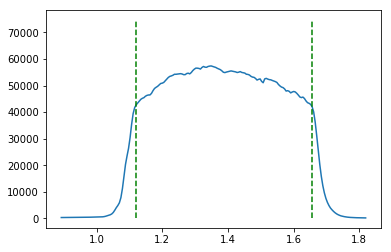

In [65]:

w1 = 1.12
w2 = 1.655
firstspec = df_sorted[Wave].iloc[1]
plt.plot(Wave, firstspec)
plt.plot([w1, w1], [np.min(firstspec), 1.3*np.max(firstspec)], '--', color='g')
plt.plot([w2, w2], [np.min(firstspec), 1.3*np.max(firstspec)], '--', color='g')
plt.show()

Estimated photon noise: 43.09061168355537 ppm
4.349770491564425e-05


<ErrorbarContainer object of 3 artists>

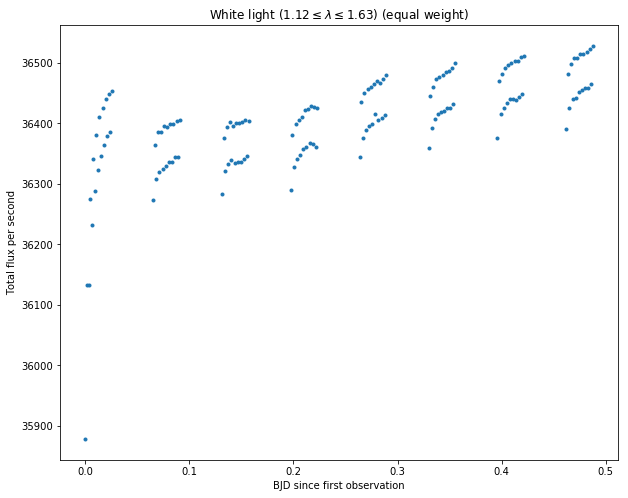

In [66]:
Wavelengthrange = (Wave > w1) & (Wave < w2)
Whitelight_LC, Whitelight_errors = fit_fns.calc_WL(df_sorted, df_sorted_err, Wave[Wavelengthrange]) #np.array(np.sum(df_sorted[Wave[Wavelengthrange]], axis=1))
Whitelight_LC, Whitelight_errors = Whitelight_LC  / imagesize, Whitelight_errors  / imagesize
#plt.scatter(sorted_times, Whitelight_LC)
fig,axs=plt.subplots(1,1,figsize=(10,8))
plt.xlabel('BJD since first observation')
plt.ylabel('Total flux per second')
plt.title('White light ($1.12 \leq \lambda \leq 1.63$) (equal weight)')
#plt.show()
print "Estimated photon noise:", 1. / np.sqrt(np.mean(Whitelight_LC *imagesize * exptime)) * 1.e6, "ppm"
print np.mean(Whitelight_errors)/ np.mean(Whitelight_LC)
#for i in range(len(Whitelight_LC)):
#    temp=1./np.sqrt((Whitelight_LC[i] *imagesize * exptime)) * 1.e6
#    print (temp)
#t,x_shift,x_shift_err=np.loadtxt('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_taub/output/xshift_full.txt',unpack=True)
#Whitelight_LC=Whitelight_LC/(1+x_shift)
#plt.scatter(sorted_times, Whitelight_LC)
plt.errorbar(sorted_times,Whitelight_LC,yerr=Whitelight_errors,ls='none',marker='.')
#plt.savefig ('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_taub/output/v1298_whitelc_delx.pdf',format='pdf')

In [67]:
Fir = np.arange(0,18)
Sec = np.arange(18,36)
Thi = np.arange(36,54)
For = np.arange(54,72)
Fif =np.arange(72,90)
Six = np.arange(90,108)
Sev = np.arange(108,126)
Eig = np.arange(126,144)
#Nin = np.arange(144,162)
#Ten = np.arange(162,180)
#print (Fir,Sec)

Ex_Fir_orbit = np.concatenate((Sec, Thi, For, Fif, Six,Sev,Eig))

Orbits = [Fir, Sec, Thi, For, Fif, Six,Sev,Eig]
Orbit_times = []
for i,o in enumerate(Orbits):
    Orbit_start = sorted_times[o[0]] - 1.e-6
    if i < len(Orbits) - 1:
        Orbit_end = sorted_times[Orbits[i+1][0]] - 1.e-6
    else:
        Orbit_end = sorted_times[-1] + 1.e-6
    Orbit_times.append([Orbit_start, Orbit_end])
    
    
#Which orbits are out of transit and could be used for a divide-out-of-transit?
Out_of_transit = np.concatenate((  Six,Sev,Eig))
excl_First = np.concatenate(( Sec,Thi, For, Fif, Six,Sev,Eig))


Forwardscanned = np.array(df_sorted['Forward'] == True)

df_F = df_sorted[Forwardscanned]
df_F_err = df_sorted_err[Forwardscanned]
df_R = df_sorted[~Forwardscanned]
df_R_err = df_sorted_err[~Forwardscanned]


Out_of_transit_F = []
Out_of_transit_R = []
Excl_First = np.zeros(len(sorted_times), dtype=bool)
for i in np.arange(len(sorted_times)):
    if Forwardscanned[i] and i in Out_of_transit and i not in Fir:
        Out_of_transit_F.append(i)
    if not Forwardscanned[i] and i in Out_of_transit and i not in Fir:
        Out_of_transit_R.append(i)
    if i in excl_First:
        Excl_First[i] = True
        
Out_of_transit_F = np.array(Out_of_transit_F)
Out_of_transit_R = np.array(Out_of_transit_R)

In [68]:
f_i = np.array(np.mean(df_sorted[Wave[Wavelengthrange]], axis=1) / imagesize)
f_i_err = np.array(np.mean(df_sorted_err[Wave[Wavelengthrange]], axis=1) / imagesize / np.sqrt(len(Wavelengthrange)))
#Let's normalize the data to have the data ~1 outside of transit
#f_i_err /= np.max(f_i)
#f_i /= np.max(f_i)
f_i_full, f_i_full_err = f_i.copy(), f_i_err.copy()
f_i_err /= np.max(f_i)
f_i /= np.max(f_i)

source = ColumnDataSource(data=dict(times=sorted_times,
                                    flux=f_i,
                                    labels=df_sorted['Names']))

output_notebook()
p = figure()
p.scatter(x='times', y='flux', source=source)
labels = LabelSet(x='times', y='flux', text='labels', level='glyph', x_offset=5, y_offset=5, source=source, render_mode='canvas', text_font_size='8px')
p.add_layout(labels)
show(p)

Loading BokehJS ...

2457064.28161
297
Fitting a transit
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 15
    # data points      = 119
    # variables        = 15
    chi-square         = 538.430993
    reduced chi-square = 5.17722109
    Akaike info crit   = 209.634766
    Bayesian info crit = 251.321618
[[Variables]]
    depth_F:                  9.3346e-04 +/- 4.2488e-05 (4.55%) (init = 0.00147)
    depth_R:                  9.3346e-04 +/- 4.2488e-05 (4.55%) == 'depth_F'
    Mid_transit_time_offset:  0.126 (fixed)
    Inclination:              88.49 (fixed)
    Eccentricity:             0 (fixed)
    aRs:                      13.2140210 +/- 0.35688025 (2.70%) (init = 13.19)
    u1:                       0.58 (fixed)
    u2:                       0 (fixed)
    Phase_offset:             0 (fixed)
    V2_F:                    -0.00483877 +/- 0.00115706 (23.91%) (init = -0.003)
    V2_R:                     6.4849e-04 +/- 0.00113645 (175.25%) (init = -0.003)
    Stellar_

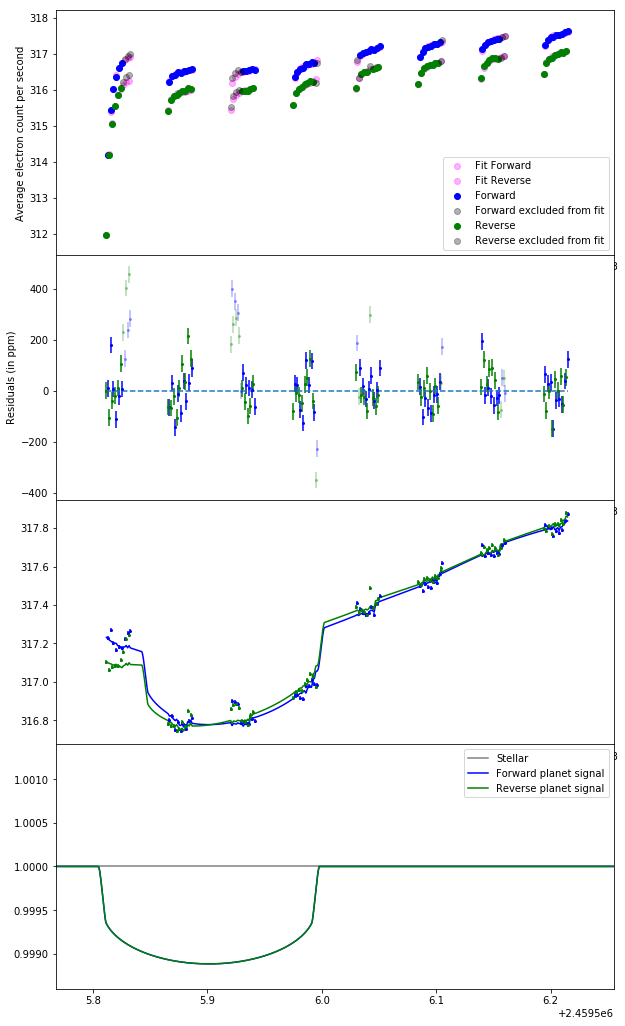

[ True  True  True  True  True  True  True  True  True  True  True  True
 False False False False False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False False False False False False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
  True False False  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
[0.0009334560597711934, 0.0009334560597711934, 0.126, 88.49, 0.0, 13.214021016954058, 0.58, 0.0, 0.0, -0.004838774555871146

In [74]:
reload(fit_fns)
data_xshift=np.loadtxt('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_tauc/output/xshift_full.txt',usecols=(1),unpack=True)
Planet_LC = fit_fns.Planet('V1298c')
t0 = Planet_LC.sp_params.t0
Planet_LC.sp_params.u1=0.0
print (t0)
count=0
while t0 < min(Times_org) + Planet_LC.sp_params.per:
    t0 += Planet_LC.sp_params.per
    count=count+1
t0 -= 2 * Planet_LC.sp_params.per
print (count)
Excl_first = np.ones_like(sorted_times, dtype=bool)
Transit_orb = np.zeros_like(sorted_times)
Transit_orb[Sec]=1
Transit_orb[Thi]=1
Transit_orb[For]=1
#Excl_first[Eig] = False
#Excl_first[[Nin[8],Nin[9],Nin[10]]]=False
#Excl_first[[Nin[9]]]=False
#Excl_first[Nin]=False
#print (Thi)
n0=len(Thi)-1
#print (Thi[n0-3:])
#Excl_first[Thi[n0-3:]]=False
#Excl_first[Sec]=False
#Excl_first[For]=False
#print (Planet_LC.sp_params.rp)
exc_indices=[]
#exc_indices.extend(Fir)
#exc_indices.extend(Sec)
#exc_indices.extend(For)
#exc_indices.extend(Fif)
#exc_indices.extend(Six)
#exc_indices.extend(Sev)
#exc_indices.extend(Eig)
#exc_indices.append(13)
#exc_indices.append(135)
#exc_indices.append(161)
#exc_indices.append(160)
#exc_indices.append(69)
#exc_indices.append(71)
#exc_indices.append(85)
#lis1=[118,119,120,121,122,123,124,125]
lis=[12,13,14,15,16,17,82,106,107,124,125,123,122,70,71,73,74,36,37,38,39,40,41,42,43]
exc_indices.extend(lis)
#print (exc_indices)
opt, err, chi2, bic,out,eclipse_LC,Res,Error,Expected,temp = Planet_LC.Fit_with_recte_lmfit(sorted_times[Excl_first] + min(Times_org), 
                                                           f_i_full[Excl_first], f_i_full_err[Excl_first], Transit_orb,
                                                           np.array(Orbit_times)[1:] + min(Times_org), 
                                                           Forwardscanned[Excl_first],data_xshift[Excl_first], 
                                                           fix_limb_dark=True, limb_dark='linear', 
                                                           fix_inclination=True, 
                                                           fix_eccentricity=True, fix_aRs=False,
                                                           nosat=True,deltat=0.126,u1=0.58,
                                                           t0=t0, exptime = exptime, exc_indices=exc_indices,c_xshift=0.0,
                                                           Transit=True,polynomial=True,order=3,fitting_method='least_squares',stel_pulse=False,sine=False,vary_cxshift=True,
                                                           fit_transit=True,jitter=False,separate_depth=False)
fit_opt = opt[:-3]
print (Planet_LC.exc_array)
'''
LC_new = Planet_LC.func(sorted_times[Excl_first] + min(Times_org), *fit_opt,
                                                                          Forward=Forwardscanned[Excl_first],
                                                                          sp_params=Planet_LC.sp_params,
                                                                          orbit_times=Planet_LC.orbit_times,
                                                                          satellite_time=Planet_LC.satellite_time,
                                                                          Include=Planet_LC.exc_array,
                                                                          exptime=exptime,
                                                                          noexcl=Planet_LC.noexcl,
                                                                          Stel_puls_phase=opt[-3],
                                                                          Stel_puls_amp=opt[-2], Harm_amp=opt[-1],
                                                                          fit=False)[0]




print "residuals on fitted data in ppm",np.sqrt(np.sum((/Users/s.baratuva.nl/Desktop/PhD/f_i_full[Excl_first] - LC_new)**2./ f_i_full[Excl_first]**2.) / len(f_i_full[Excl_first])) *1.e6
print "Estimated photon noise:", 1. / np.sqrt(np.mean(f_i_full[Excl_first] * np.sum(Wavelengthrange) * imagesize * exptime)) * 1.e6, "ppm"

noise_g_F = np.sqrt(np.sum((f_i[Excl_first] - LC_new)**2./ f_i_full[Excl_first]**2.) / len(f_i_full[Excl_first])) *1.e6
noise_g_R = np.sqrt(np.sum((f_i[Excl_first] - LC_new)**2./ f_i_full[Excl_first]**2.) / len(f_i_full[Excl_first])) *1.e6





'''
print (opt)
print (bic)
#print (Planet_LC.sp_params.pulse_Pi)
#print (np.sqrt(f_i_full)/f_i_full_err)
print (f_i_full_err[Fir])
print (t0+Planet_LC.sp_params.per+opt[2],np.sqrt(0.001**2+1.825e-4**2))


In [75]:
import batman
import numpy as np
import matplotlib as plt
def transit_model(time,t0,per,depth,aRs,inc,ecc,w,u1,c1,c2,t_mid):

    params = batman.TransitParams()       #object to store transit parameters
    params.t0 = t0                        #time of inferior conjunction
    params.per = per                       #orbital period
    params.rp = depth                       #planet radius (in units of stellar radii)
    params.a = aRs                        #semi-major axis (in units of stellar radii)
    params.inc = inc                      #orbital inclination (in degrees)
    params.ecc = ecc                       #eccentricity
    params.w = w                        #longitude of periastron (in degrees)
    params.limb_dark = "linear"        #limb darkening model
    params.u = [u1]      #limb darkening coefficients [u1, u2, u3, u4]

    t = time+t_mid  #times at which to calculate light curve
    m = batman.TransitModel(params, t)    #initializes model
    flux = m.light_curve(params) 
    flux=flux*(c1+c2*(t-t[0]))
    return flux



def residual(pars,time,data,lc,lc_err,z,z_err):
        model=transit_model(time,pars['t0'].value,pars['per'].value,pars['depth'].value,pars['aRs'].value,
                       pars['inc'].value,pars['ecc'].value,pars['w'].value,pars['u1'].value,
                        pars['c1'].value,pars['c2'].value,pars['t_mid'].value)
        err=(lc_err/lc+(z_err/z))*data
        return (model-data)/(err)
    
    
#flux_f,t=transit_model(sorted_times[Excl_first][forward]+min(Times_org)+opt[2],t0,t_orb,depth_F,aRs,inc,ecc,w,u1)
'''
t0=Planet_LC.sp_params.t0
t_orb=Planet_LC.sp_params.per
depth_F=opt[0]
depth_R=opt[1]
aRs=opt[5]
inc=opt[3]
ecc=opt[4]
w=Planet_LC.sp_params.w
u1=opt[6]
forward=Planet_LC.Forward
flux_f=transit_model(sorted_times[Excl_first][forward]+min(Times_org)+opt[2],t0,t_orb,depth_F,aRs,inc,ecc,w,u1,150,0.0001)
flux_r=transit_model(sorted_times[Excl_first][~forward]+min(Times_org)+opt[2],t0,t_orb,depth_R,aRs,inc,ecc,w,u1,150,0.0001)

import matplotlib.pyplot as plt
plt.plot(t,flux_f,ls='none',marker='.')
plt.plot(t1,flux_r,ls='none',marker='.')

'''




"\nt0=Planet_LC.sp_params.t0\nt_orb=Planet_LC.sp_params.per\ndepth_F=opt[0]\ndepth_R=opt[1]\naRs=opt[5]\ninc=opt[3]\necc=opt[4]\nw=Planet_LC.sp_params.w\nu1=opt[6]\nforward=Planet_LC.Forward\nflux_f=transit_model(sorted_times[Excl_first][forward]+min(Times_org)+opt[2],t0,t_orb,depth_F,aRs,inc,ecc,w,u1,150,0.0001)\nflux_r=transit_model(sorted_times[Excl_first][~forward]+min(Times_org)+opt[2],t0,t_orb,depth_R,aRs,inc,ecc,w,u1,150,0.0001)\n\nimport matplotlib.pyplot as plt\nplt.plot(t,flux_f,ls='none',marker='.')\nplt.plot(t1,flux_r,ls='none',marker='.')\n\n"

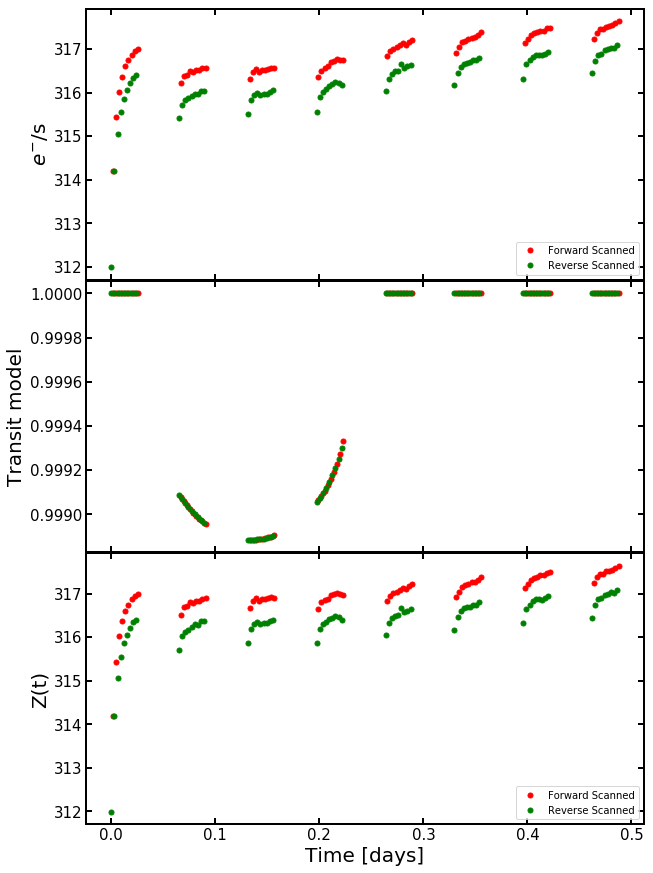

In [76]:
forward=Planet_LC.Forward
import matplotlib.pyplot as plt
z=f_i_full[Excl_first]/eclipse_LC
z_err=f_i_full_err[Excl_first]
fig,axs=plt.subplots(3,1,figsize=(10,15),sharex=True)
axs[0].plot(sorted_times[Excl_first][forward],f_i_full[Excl_first][forward],ls='none',marker='.',ms=10,color='red',label='Forward Scanned')
axs[0].plot(sorted_times[Excl_first][~forward],f_i_full[Excl_first][~forward],ls='none',marker='.',ms=10,color='green',label='Reverse Scanned')
axs[0].legend(loc='lower right')
axs[1].plot(sorted_times[Excl_first][forward],eclipse_LC[forward],ls='none',marker='.',ms=10,color='red')
axs[1].plot(sorted_times[Excl_first][~forward],eclipse_LC[~forward],ls='none',marker='.',ms=10,color='green')
axs[2].plot(sorted_times[Excl_first][forward],z[forward],ls='none',marker='.',color='red',ms=10,label='Forward Scanned')
axs[2].plot(sorted_times[Excl_first][~forward],z[~forward],ls='none',marker='.',color='green',ms=10,label='Reverse Scanned')
axs[2].legend(loc='lower right')
axs[0].set_ylabel(r'$e^{-}$/s',fontsize=20)
axs[2].set_ylabel('Z(t)',fontsize=20)
axs[2].set_xlabel('Time [days]',fontsize=20)
axs[1].set_ylabel('Transit model',fontsize=20)
plt.subplots_adjust(hspace=0.005)
for i in range(3):
   # ax=axs[i]
    axs[i].tick_params('both',direction='in',labelsize=15,length=6,width=2,top=True,right=True)
    for axis in ['top','bottom','left','right']:
        axs[i].spines[axis].set_linewidth(2.0)
#plt.savefig('/Users/s.baratuva.nl/Desktop/PhD/

('Res in ppm ', 289.2576048361932)
('Res in ppm ', 219.33131510686005)
('Res in ppm ', 217.04335700344998)
('Res in ppm ', 208.99179122091928)
('Res in ppm ', 199.75536096575152)
('Res in ppm ', 231.1745279085282)
('Res in ppm ', 202.7541018828636)
('Res in ppm ', 238.67888562489264)
('Res in ppm ', 224.19520414986383)
('Res in ppm ', 301.10415123099745)
('Res in ppm ', 223.45274682270227)
('Res in ppm ', 251.245625749478)
('Res in ppm ', 199.9508828588433)
('Res in ppm ', 197.5579672258912)
('Res in ppm ', 222.0955897369191)
('Res in ppm ', 223.88082658211286)
('Res in ppm ', 239.4557558968984)
('Res in ppm ', 240.0482867221012)
('Res in ppm ', 223.3214904565005)
('Res in ppm ', 278.4111512511341)
('Res in ppm ', 261.31955526496284)
('Res in ppm ', 276.31787971667353)
('Res in ppm ', 324.95542951253634)


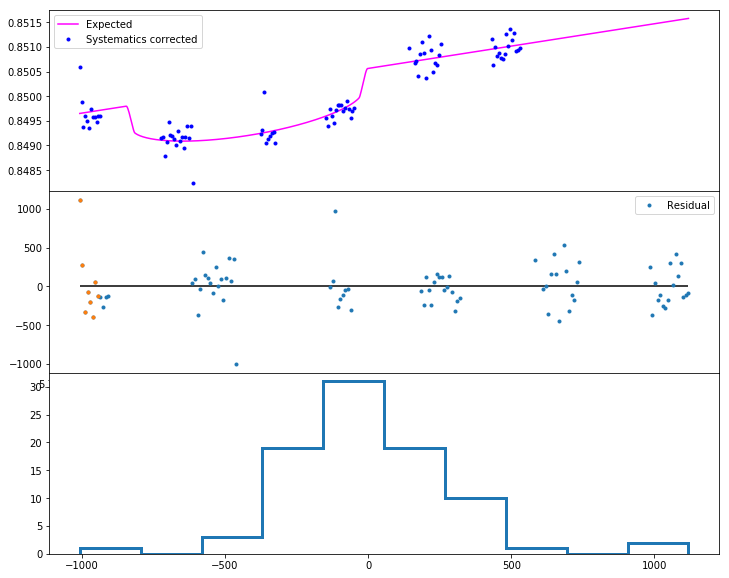

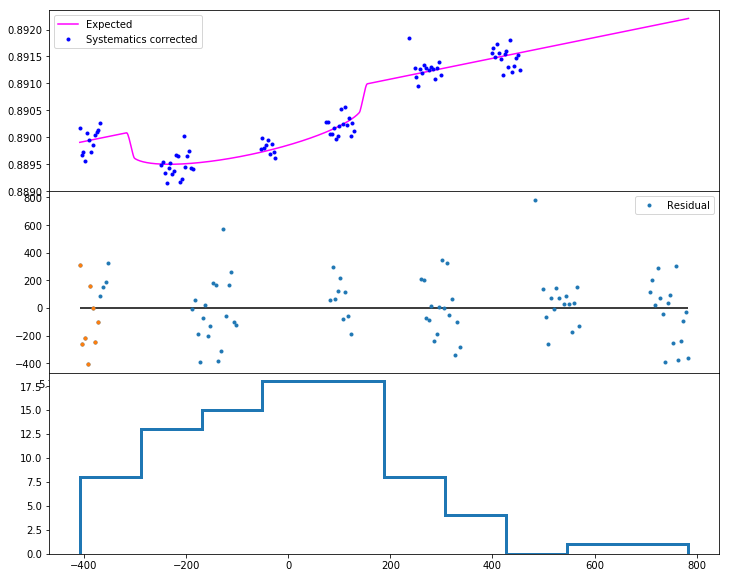

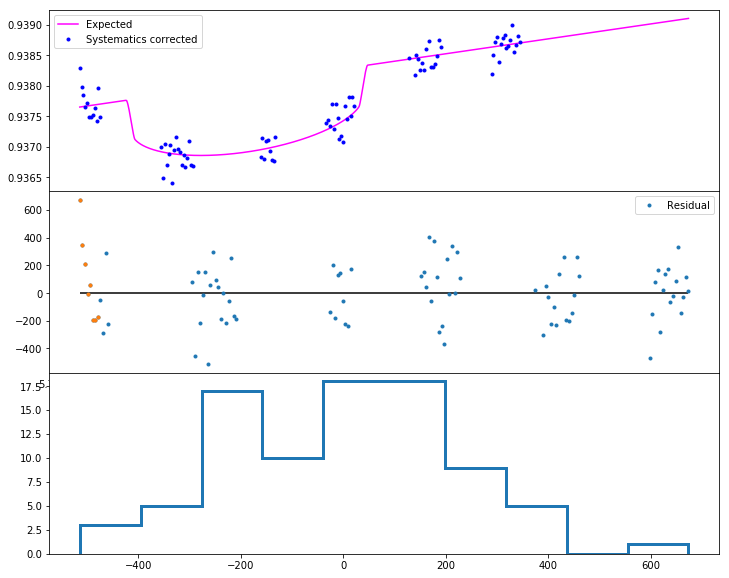

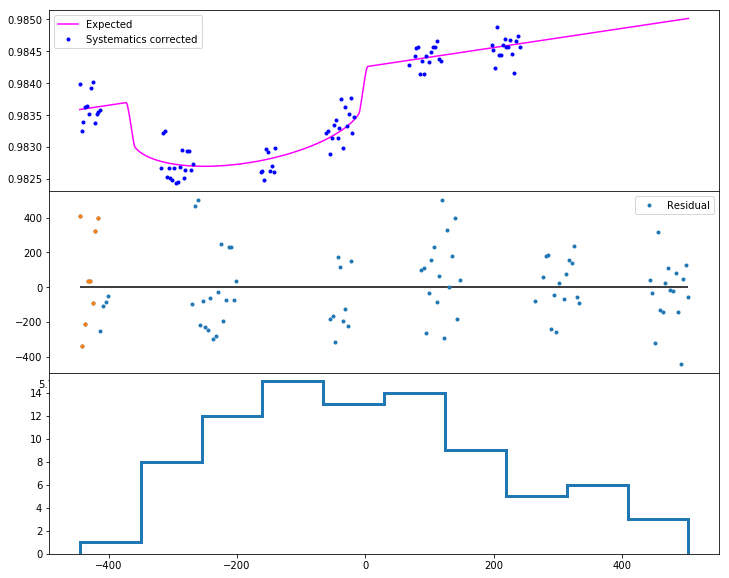

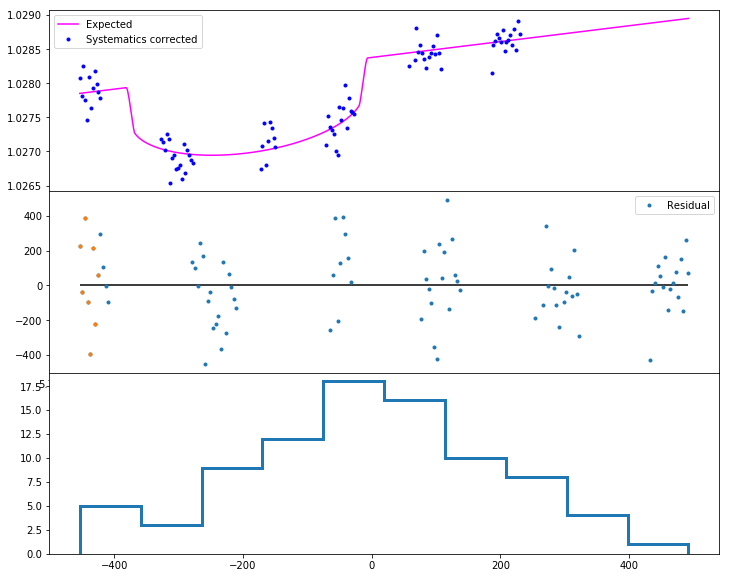

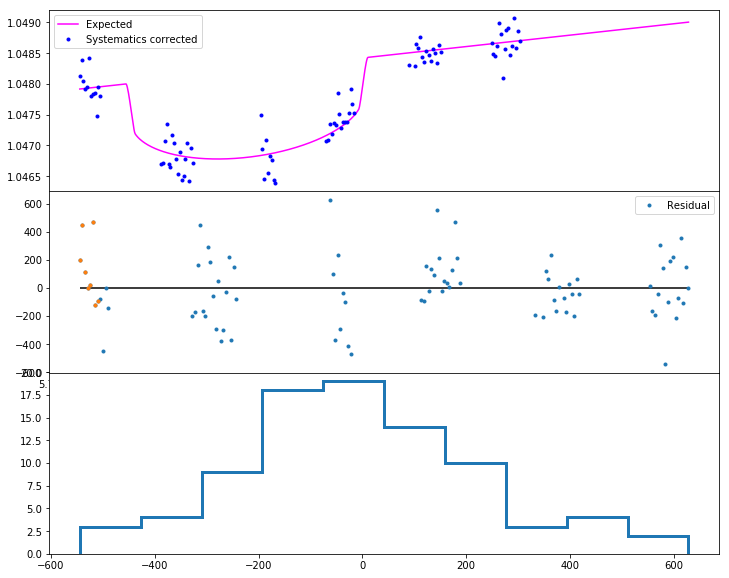

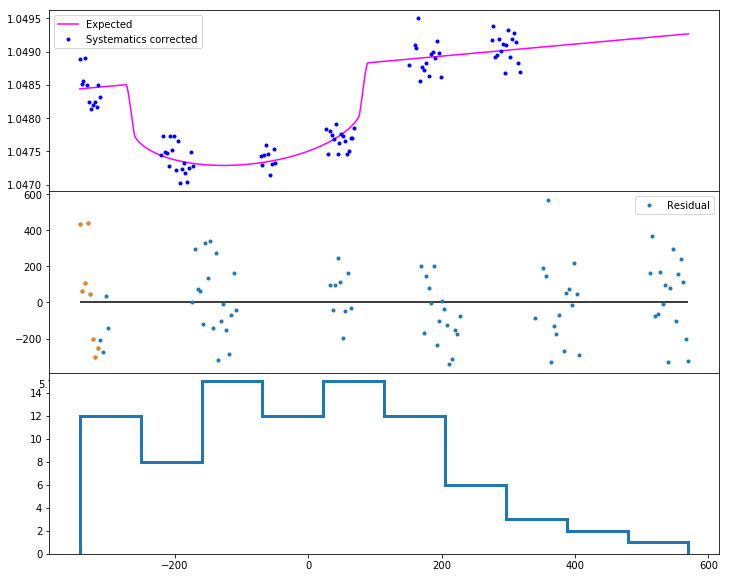

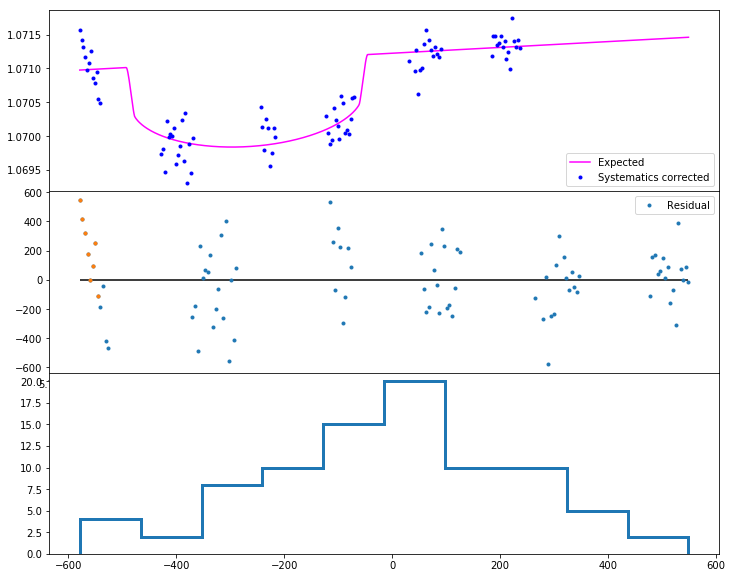

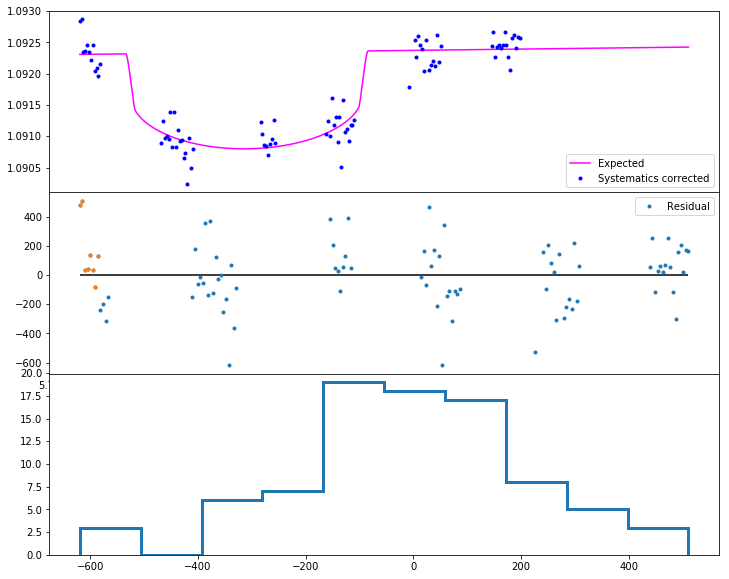

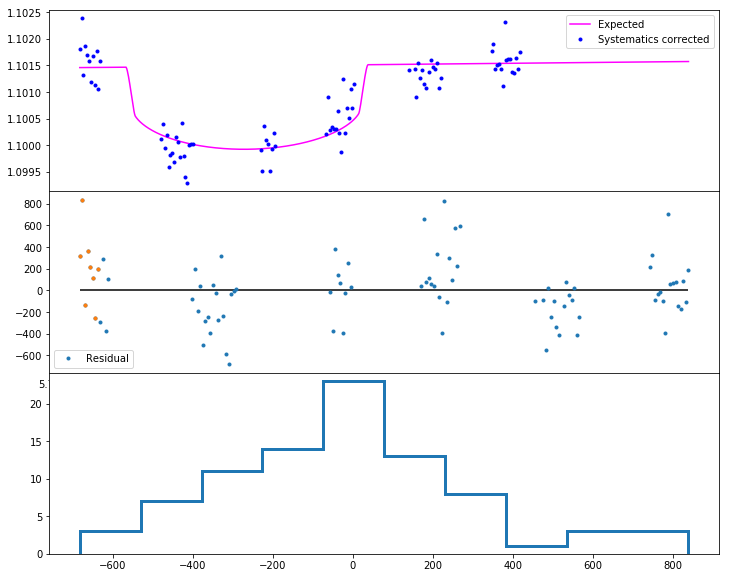

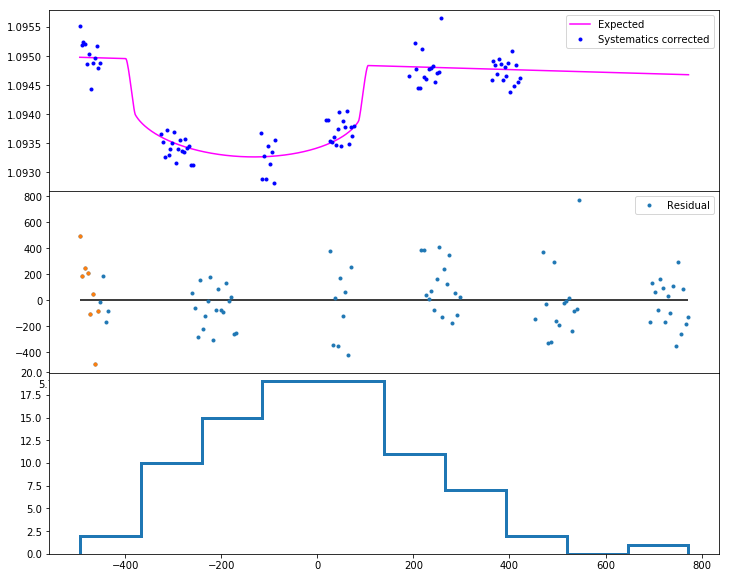

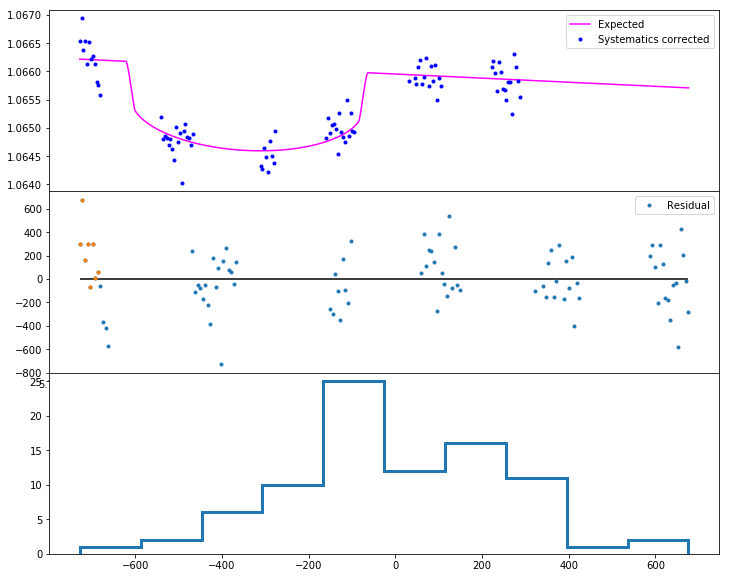

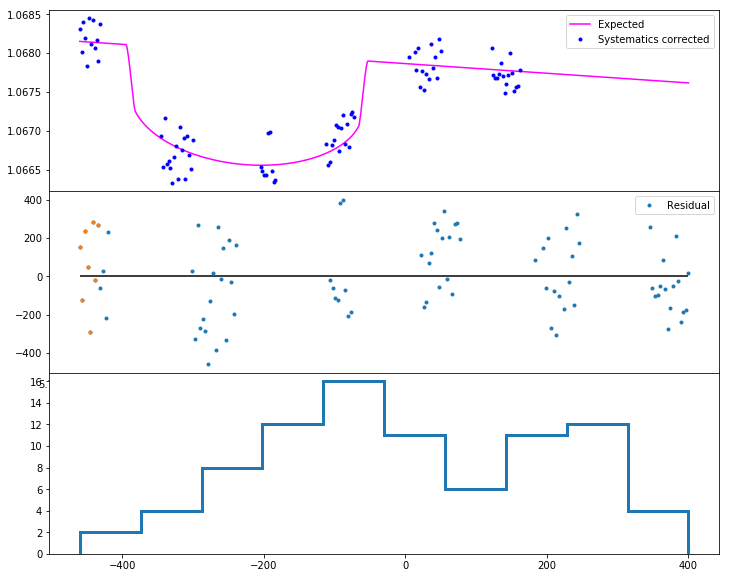

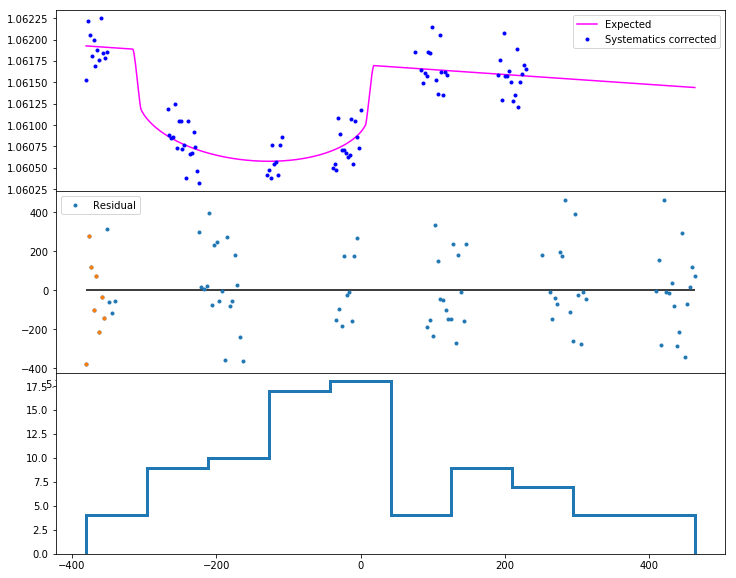

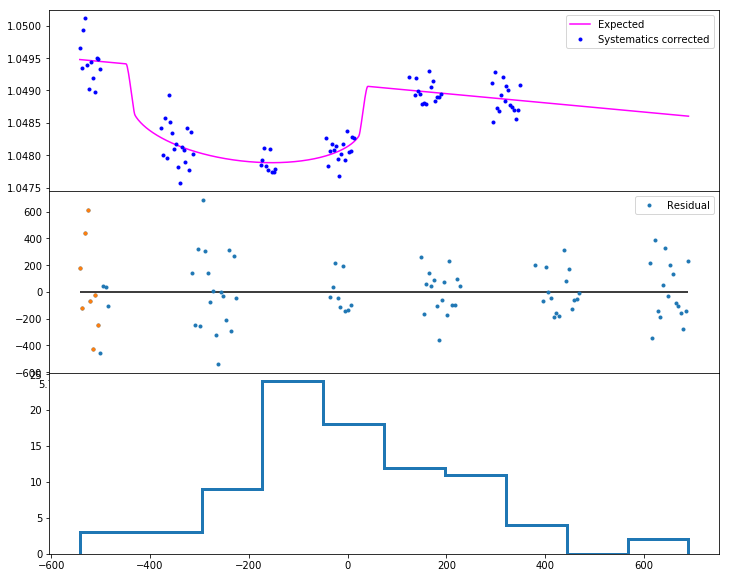

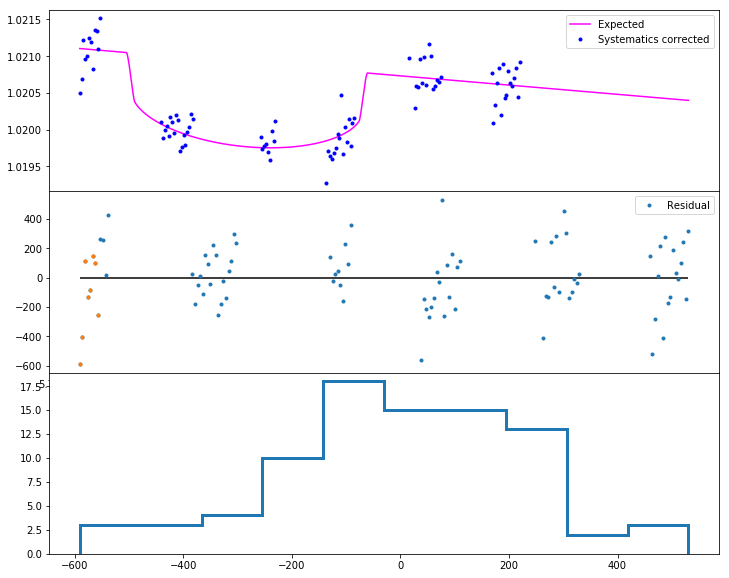

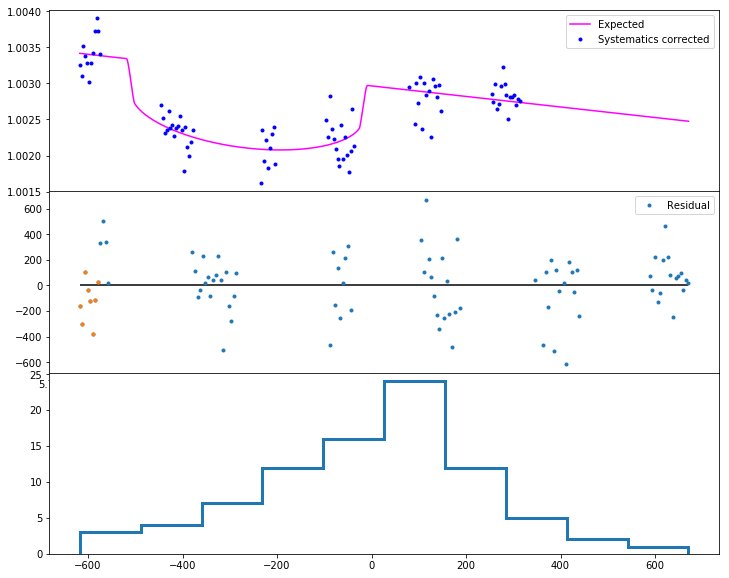

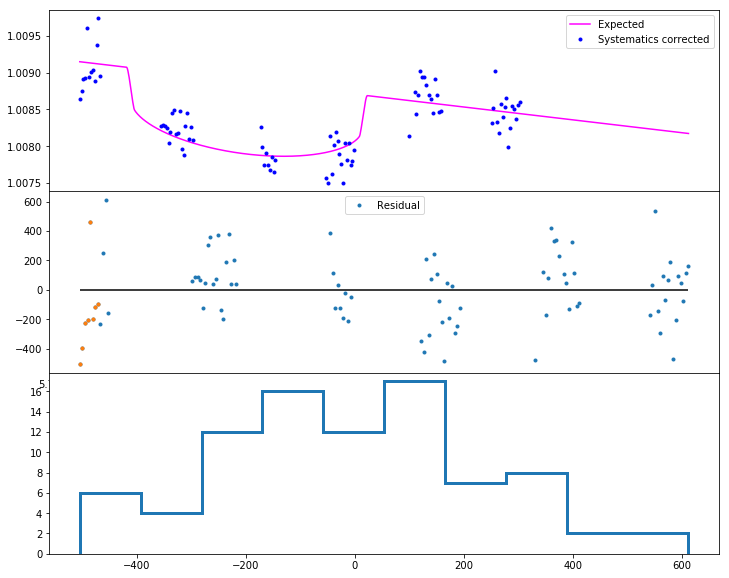

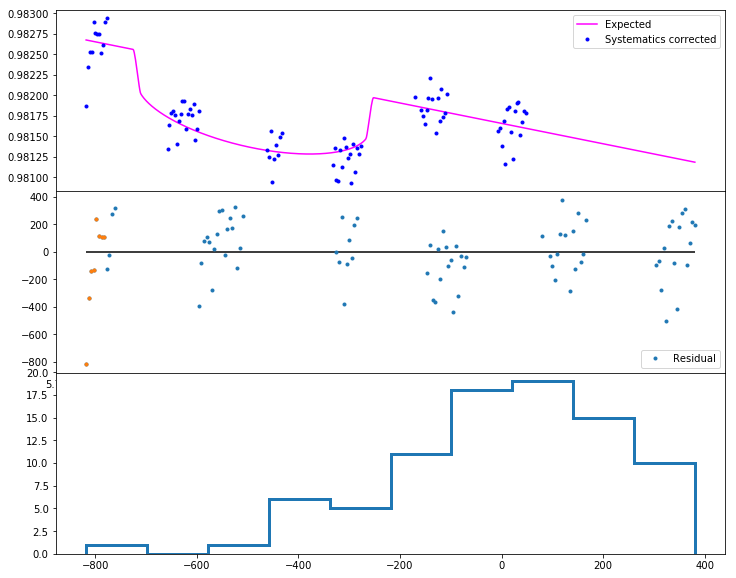

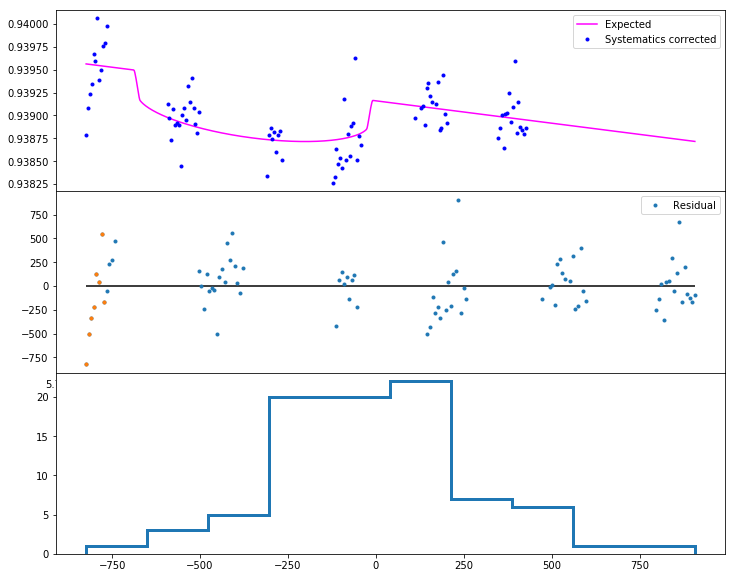

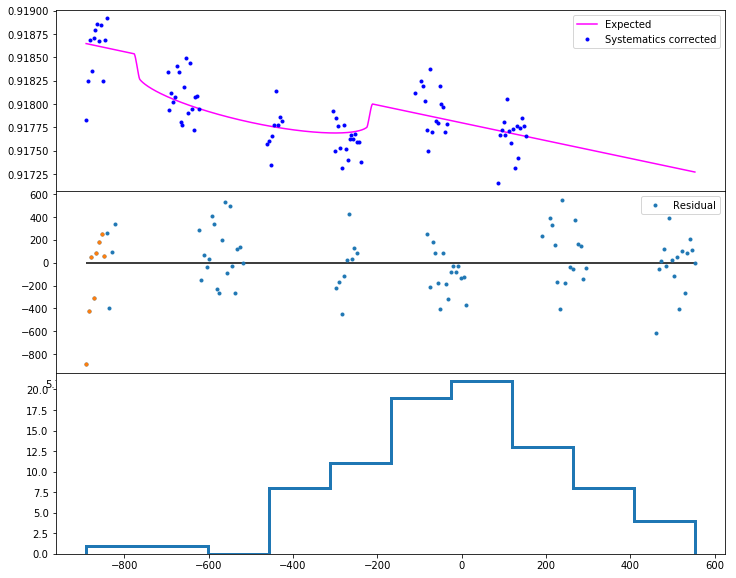

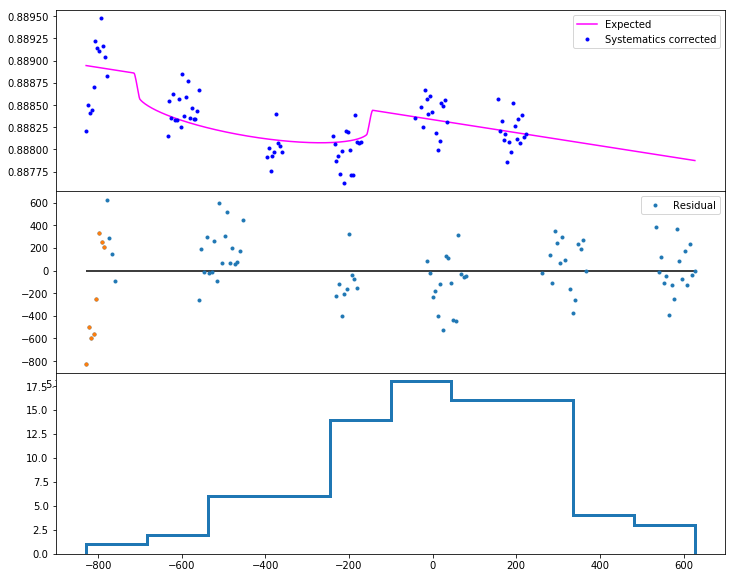

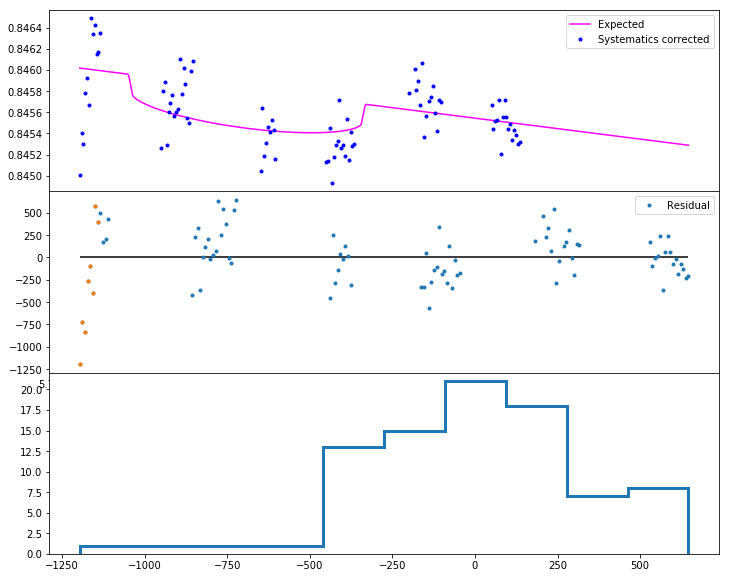

In [77]:
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels import robust
Nr_pixels = 5
bins = []
i = 0
res_median=[]
res_dev=[]
WL_waves = Wave[(Wave > w1) & (Wave < w2)]#Wave[Wavelengthrange]
while i < len(WL_waves):
    bins.append(WL_waves[i:i+Nr_pixels])
    i += Nr_pixels
bins_avg_wave = [np.mean(bin) for bin in bins]
bins_std_wave= [np.std(bin) for bin in bins]

N_bins = len(bins_avg_wave)

excl_indices=[]
#excl_indices.append(135)

lis1=[12,13,14,15,16,17,82,106,107,124,125,123,122,36,37,38,39,40,41,42,43,44,70,71,73,74]
#lis1=[118,119,120,121,122,123,124,125]
inc=np.ones(len(z),dtype=bool)
forward=Planet_LC.Forward
excl_indices.extend(lis1)
excl_indices.extend(Sev)
excl_indices.extend(Eig)
inc[excl_indices]=False
import lmfit
Rad=np.array([])
Rad_err=np.array([])
#Rad_r=np.array([])
#Rad_err_r=np.array([])
u_limb=np.array([])
u_limb_err=np.array([])
Res=np.array([])
mid_time=np.array([])
mid_time_err=np.array([])
for i in range (N_bins):
    Binned_LC, Binned_LC_err = fit_fns.calc_WL(df_sorted, df_sorted_err, bins[i], average=True, weighted=False)
    Binned_LC=Binned_LC/imagesize
    Binned_LC_err=Binned_LC_err/imagesize
  #  Binned_LC=Binned_LC/np.max(Binned_LC)
  #  Binned_LC_err=Binned_LC_err/np.max(Binned_LC)
    data_f=Binned_LC[Excl_first][inc]/z[inc]
    times_f=sorted_times[Excl_first][inc]+min(Times_org)
    times_plot=np.linspace(min(sorted_times),max(sorted_times),1000)
    times_plot+=min(Times_org)
    
 #   data_r=Binned_LC[Excl_first][~forward*inc]/z[~forward*inc]
 #   times_r=sorted_times[Excl_first][~forward*inc]+min(Times_org)
#import lmfit
    params=lmfit.Parameters()
    params.add('t0',value=Planet_LC.sp_params.t0,vary=False)

    params.add('per',value=Planet_LC.sp_params.per,vary=False)
    params.add('aRs',value=opt[5],vary=False)
    params.add('depth',value=np.sqrt(opt[0]),max=0.1,min=0.0)
    params.add('inc',value=opt[3],vary=False)
    params.add('ecc',value=Planet_LC.sp_params.ecc,vary=False)
    params.add('w',value=Planet_LC.sp_params.w,vary=False)
    params.add('u1',value=opt[6],vary=False)
    params.add('c1',value=1.0,min=0.6,max=1.2)
    params.add('c2',value=0.0,max=1,min=-1)
    params.add('t_mid',value=opt[2],vary=False)
    out_f=lmfit.minimize(residual,params,args=(times_f,data_f,Binned_LC[Excl_first][inc],Binned_LC_err[Excl_first][inc],z[inc],z_err[inc]),method='leastsq')
#    out_r=lmfit.minimize(residual,params,args=(times_r,data_r),method='leastsq')
 #   if (i==7):
        
#    lmfit.report_fit(out_f)
    opt_f = [out_f.params[key].value for key in out_f.params.keys()]
    err_f = [out_f.params[key].stderr for key in out_f.params.keys()]
    u_limb=np.append(u_limb,opt_f[7])
    u_limb_err=np.append(u_limb_err,err_f[7])
    mid_time=np.append(mid_time,opt_f[10])
    mid_time_err=np.append(mid_time_err,err_f[10])
 #   opt_r = [out_r.params[key].value for key in out_r.params.keys()]
 #   err_r = [out_r.params[key].stderr for key in out_r.params.keys()]
#print (opt)
    expected_f=transit_model(times_f,t0=opt_f[0],per=opt_f[1],aRs=opt_f[2],depth=opt_f[3],inc=opt_f[4],ecc=opt_f[5],w=opt_f[6]
                            ,u1=opt_f[7],c1=opt_f[8],c2=opt_f[9],t_mid=opt_f[10])
    expected_plot=transit_model(times_plot,t0=opt_f[0],per=opt_f[1],aRs=opt_f[2],depth=opt_f[3],inc=opt_f[4],ecc=opt_f[5],w=opt_f[6]
                            ,u1=opt_f[7],c1=opt_f[8],c2=opt_f[9],t_mid=opt_f[10])
#    expected_r=transit_model(times_r,t0=opt_r[0],per=opt_r[1],aRs=opt_r[2],depth=opt_r[3],inc=opt_r[4],ecc=opt_r[5],w=opt_r[6]
#                            ,u1=opt_r[7],c1=opt_r[8],c2=opt_r[9],t_mid=opt_r[10])
#    print ('Residual in ppm',(np.sqrt(sum((data_f-expected_f)**2/expected_f**2))/len(data_f))*1e6)
    res_f=data_f-expected_f
 #   res_r=data_r-expected_r
#    if (i==7):
    print ('Res in ppm ',np.sqrt(np.sum(res_f**2/data_f**2)/len(data_f))*1e6)
    Res=np.append(Res,np.sqrt(np.sum(res_f**2/data_f**2)/len(data_f))*1e6)
 #         ,np.sqrt(np.sum(res_r**2/data_r**2)/len(data_r))*1e6)
    fig,axs=plt.subplots(3,1,figsize=(12,10),sharex=False,gridspec_kw={'hspace':0})
    axs[0].plot(times_plot,expected_plot,color='magenta',label='Expected')
    axs[0].plot(times_f,data_f,ls='none',marker='.',color='blue',label='Systematics corrected')
  #  axs[0].plot(times_r,expected_r,ls='none',marker='.',color='magenta',label='Expected')
  #  axs[0].plot(times_r,data_r,ls='none',marker='.',color='green',label='Reverse')
    axs[1].plot(times_f,((data_f-expected_f)/np.max(expected_f))*1e6,ls='none',marker='.',label='Residual')
    list1=[0,1,2,3,4,5,6,7]
    axs[1].plot(times_f[list1],((data_f[list1]-expected_f[list1])/np.max(expected_f))*1e6,ls='none',marker='.')
  #  res_median.append(np.median(((data_f[Sev]-expected_f[Sev])/np.max(expected_f))*1e6))
 #   res_dev.append(robust.mad(((data_f[Sev]-expected_f[Sev])/np.max(expected_f))*1e6))
    axs[2].hist(((data_f-expected_f)/np.max(expected_f))*1e6,histtype='step',linewidth=3)
  #  axs[1].plot(times_r,((data_r-expected_r)/np.max(expected_r))*1e6,ls='none',marker='.',label='Reverse')
    
    axs[1].hlines(0,min(times_f),max(times_f))
    axs[1].legend()
    axs[0].legend()
    Rad=np.append(Rad,opt_f[3])
    Rad_err=np.append(Rad_err,err_f[3])
  #  Rad_r=np.append(Rad_r,opt_r[3])
  #  Rad_err_r=np.append(Rad_err_r,err_r[3])

<ErrorbarContainer object of 3 artists>

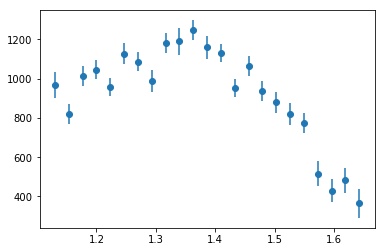

In [78]:
plt.errorbar(bins_avg_wave,(Rad**2)*1e6,yerr=2*Rad*Rad_err*1e6,ls='none',marker='o')

In [106]:
deltat = opt[2]
aRs = opt[5]
incl=opt[3]
e_os=opt[13]
e_of=opt[14]
del_es=opt[15]
del_ef=opt[16]
#e_os=0.0
#e_of=0.0
#del_es=0.0
#del_ef=0.0
print (incl,e_os)
u11=opt[6]
u22=opt[7]
cx=opt[-2]
print (cx)
ph_noise=np.sqrt(23.0)*43.09606467963658

(88.49, 95.14988920721795)
0.00337101110875


In [123]:
Nr_pixels = 5
bins = []
i = 0
WL_waves = Wave[(Wave > w1) & (Wave < w2)]#Wave[Wavelengthrange]
while i < len(WL_waves):
    bins.append(WL_waves[i:i+Nr_pixels])
    i += Nr_pixels
bins_avg_wave = [np.mean(bin) for bin in bins]

N_bins = len(bins_avg_wave)

cm = plt.cm.get_cmap('RdYlGn')
colors = cm(np.arange(N_bins)  * cm.N / N_bins)
print (N_bins)
ph_noise=np.sqrt(N_bins)*43.09606467963658
print (ph_noise)

23
206.68146552132495


Fitting a transit
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 11
    # data points      = 135
    # variables        = 12
    chi-square         = 141.857576
    reduced chi-square = 1.15331363
    Akaike info crit   = 30.6890867
    Bayesian info crit = 65.5523840
[[Variables]]
    depth_F:                  0.00126676 +/- 6.8409e-05 (5.40%) (init = 0.00147)
    depth_R:                  0.00126676 +/- 6.8409e-05 (5.40%) == 'depth_F'
    Mid_transit_time_offset:  0.126 (fixed)
    Inclination:              88.49 (fixed)
    Eccentricity:             0 (fixed)
    aRs:                      13.21402 (fixed)
    u1:                       0.58 (fixed)
    u2:                       0 (fixed)
    Phase_offset:             0 (fixed)
    V2_F:                     0.00548834 +/- 0.00113273 (20.64%) (init = -0.003)
    V2_R:                     0.00734540 +/- 0.00112168 (15.27%) (init = -0.003)
    Stellar_flux_F:           269.640893 +/- 0.03102283 (0.01%)

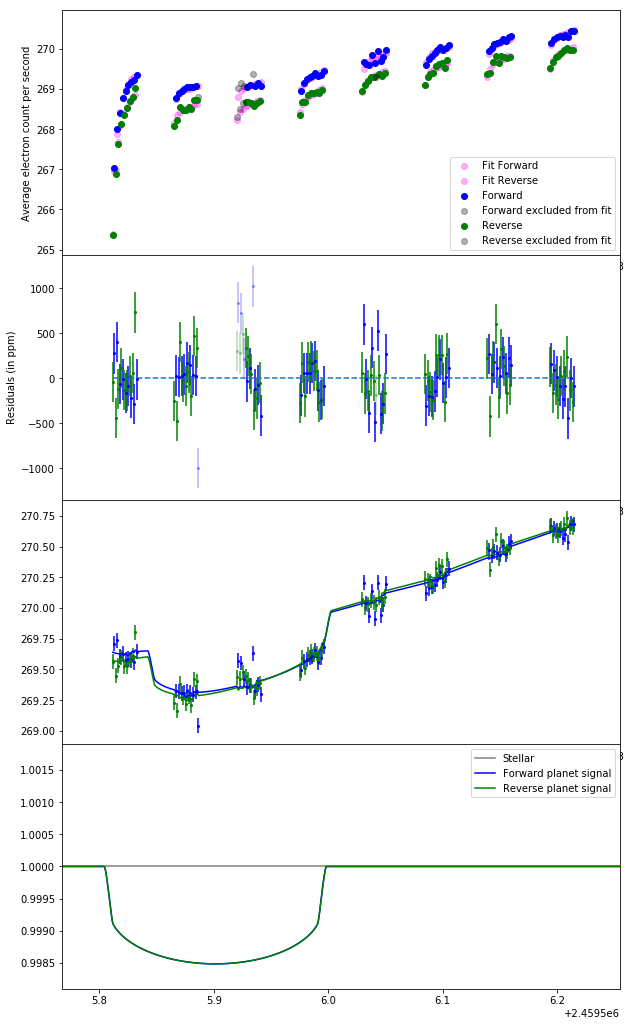

('Wavelength', array([1.12084605, 1.12550243, 1.13015885, 1.13481531, 1.1394718 ]))
Fitting a transit
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 12
    # data points      = 135
    # variables        = 12
    chi-square         = 145.251252
    reduced chi-square = 1.18090449
    Akaike info crit   = 33.8806818
    Bayesian info crit = 68.7439792
[[Variables]]
    depth_F:                  0.00123438 +/- 6.7469e-05 (5.47%) (init = 0.00147)
    depth_R:                  0.00123438 +/- 6.7469e-05 (5.47%) == 'depth_F'
    Mid_transit_time_offset:  0.126 (fixed)
    Inclination:              88.49 (fixed)
    Eccentricity:             0 (fixed)
    aRs:                      13.21402 (fixed)
    u1:                       0.58 (fixed)
    u2:                       0 (fixed)
    Phase_offset:             0 (fixed)
    V2_F:                     0.00506480 +/- 0.00111920 (22.10%) (init = -0.003)
    V2_R:                     0.00848406 +/- 0.00110877 (13.

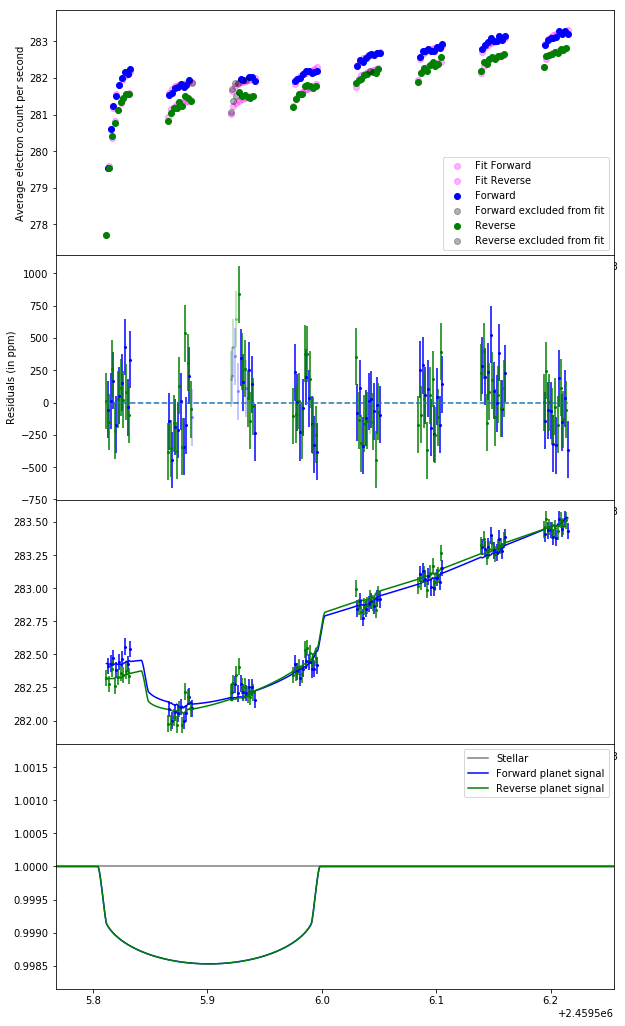

('Wavelength', array([1.14412834, 1.14878492, 1.15344153, 1.15809818, 1.16275487]))
Fitting a transit
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 6
    # data points      = 135
    # variables        = 12
    chi-square         = 133.693215
    reduced chi-square = 1.08693671
    Akaike info crit   = 22.6868492
    Bayesian info crit = 57.5501465
[[Variables]]
    depth_F:                  0.00108789 +/- 6.2736e-05 (5.77%) (init = 0.00147)
    depth_R:                  0.00108789 +/- 6.2736e-05 (5.77%) == 'depth_F'
    Mid_transit_time_offset:  0.126 (fixed)
    Inclination:              88.49 (fixed)
    Eccentricity:             0 (fixed)
    aRs:                      13.21402 (fixed)
    u1:                       0.58 (fixed)
    u2:                       0 (fixed)
    Phase_offset:             0 (fixed)
    V2_F:                     0.00648561 +/- 0.00104335 (16.09%) (init = -0.003)
    V2_R:                     0.00654366 +/- 0.00103315 (15.7

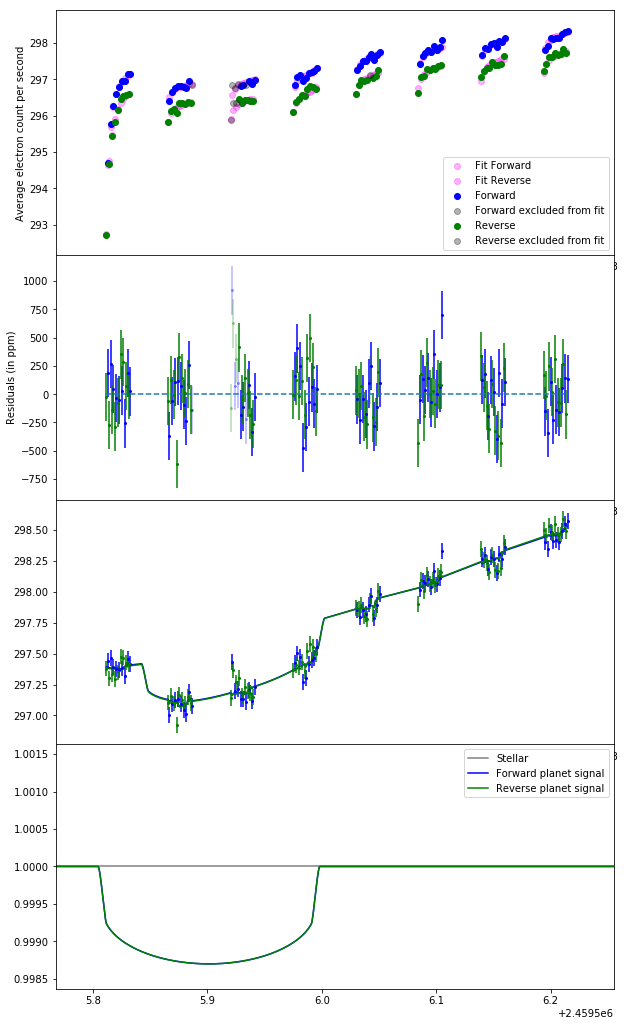

('Wavelength', array([1.1674116 , 1.17206836, 1.17672516, 1.18138199, 1.18603886]))
Fitting a transit
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 7
    # data points      = 135
    # variables        = 12
    chi-square         = 151.984901
    reduced chi-square = 1.23564961
    Akaike info crit   = 39.9983647
    Bayesian info crit = 74.8616620
[[Variables]]
    depth_F:                  0.00125237 +/- 6.5162e-05 (5.20%) (init = 0.00147)
    depth_R:                  0.00125237 +/- 6.5162e-05 (5.20%) == 'depth_F'
    Mid_transit_time_offset:  0.126 (fixed)
    Inclination:              88.49 (fixed)
    Eccentricity:             0 (fixed)
    aRs:                      13.21402 (fixed)
    u1:                       0.58 (fixed)
    u2:                       0 (fixed)
    Phase_offset:             0 (fixed)
    V2_F:                     0.00372038 +/- 0.00108495 (29.16%) (init = -0.003)
    V2_R:                     0.00495179 +/- 0.00107471 (21.7

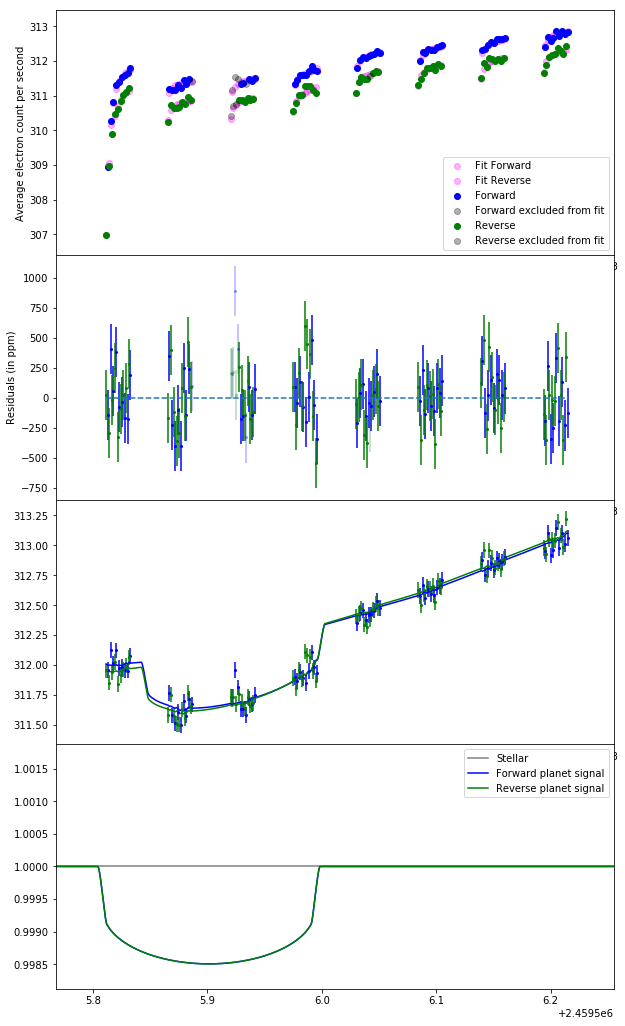

('Wavelength', array([1.19069577, 1.19535271, 1.20000968, 1.20466669, 1.20932373]))
Fitting a transit
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 5
    # data points      = 135
    # variables        = 12
    chi-square         = 143.718290
    reduced chi-square = 1.16844138
    Akaike info crit   = 32.4483386
    Bayesian info crit = 67.3116360
[[Variables]]
    depth_F:                  0.00108410 +/- 6.1803e-05 (5.70%) (init = 0.00147)
    depth_R:                  0.00108410 +/- 6.1803e-05 (5.70%) == 'depth_F'
    Mid_transit_time_offset:  0.126 (fixed)
    Inclination:              88.49 (fixed)
    Eccentricity:             0 (fixed)
    aRs:                      13.21402 (fixed)
    u1:                       0.58 (fixed)
    u2:                       0 (fixed)
    Phase_offset:             0 (fixed)
    V2_F:                     0.00410294 +/- 0.00103084 (25.12%) (init = -0.003)
    V2_R:                     0.00657216 +/- 0.00102143 (15.5

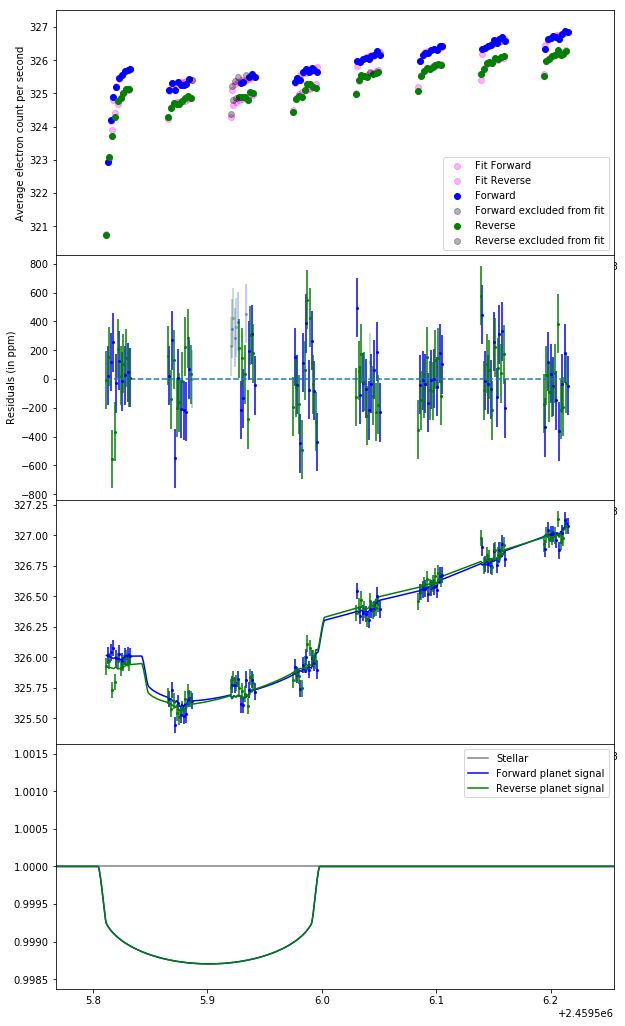

('Wavelength', array([1.2139808 , 1.2186379 , 1.22329504, 1.2279522 , 1.2326094 ]))
Fitting a transit
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 5
    # data points      = 135
    # variables        = 12
    chi-square         = 195.919327
    reduced chi-square = 1.59284005
    Akaike info crit   = 74.2778066
    Bayesian info crit = 109.141104
[[Variables]]
    depth_F:                  0.00116987 +/- 7.1446e-05 (6.11%) (init = 0.00147)
    depth_R:                  0.00116987 +/- 7.1446e-05 (6.11%) == 'depth_F'
    Mid_transit_time_offset:  0.126 (fixed)
    Inclination:              88.49 (fixed)
    Eccentricity:             0 (fixed)
    aRs:                      13.21402 (fixed)
    u1:                       0.58 (fixed)
    u2:                       0 (fixed)
    Phase_offset:             0 (fixed)
    V2_F:                     0.00518871 +/- 0.00119282 (22.99%) (init = -0.003)
    V2_R:                     0.00768431 +/- 0.00118195 (15.3

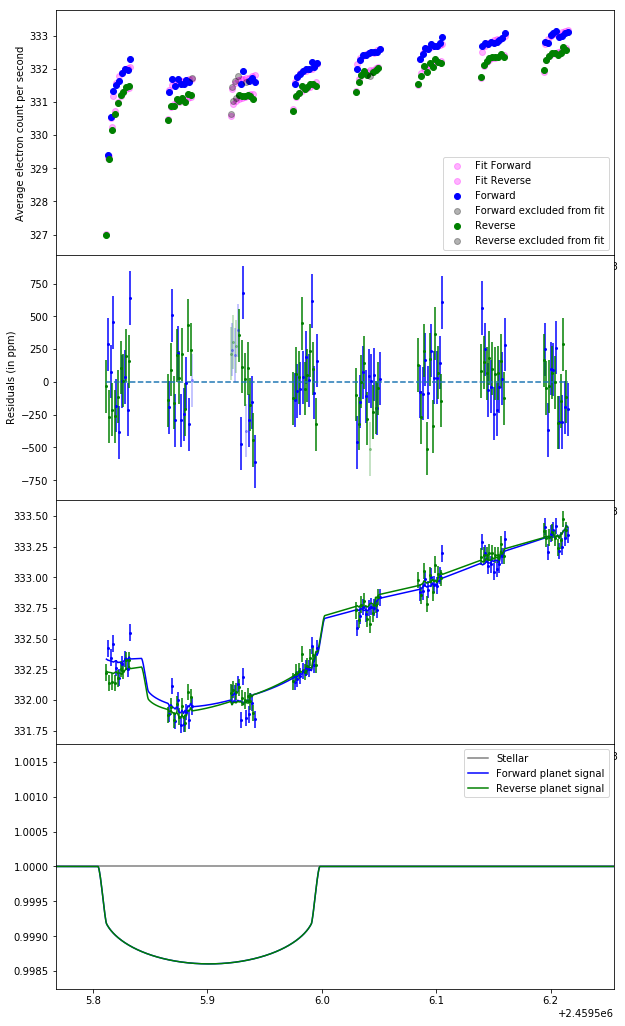

('Wavelength', array([1.23726663, 1.24192389, 1.24658118, 1.25123849, 1.25589584]))
Fitting a transit
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 10
    # data points      = 135
    # variables        = 12
    chi-square         = 143.108363
    reduced chi-square = 1.16348263
    Akaike info crit   = 31.8741924
    Bayesian info crit = 66.7374898
[[Variables]]
    depth_F:                  0.00118735 +/- 6.1068e-05 (5.14%) (init = 0.00147)
    depth_R:                  0.00118735 +/- 6.1068e-05 (5.14%) == 'depth_F'
    Mid_transit_time_offset:  0.126 (fixed)
    Inclination:              88.49 (fixed)
    Eccentricity:             0 (fixed)
    aRs:                      13.21402 (fixed)
    u1:                       0.58 (fixed)
    u2:                       0 (fixed)
    Phase_offset:             0 (fixed)
    V2_F:                     0.00277677 +/- 0.00101894 (36.70%) (init = -0.003)
    V2_R:                     0.00501562 +/- 0.00100967 (20.

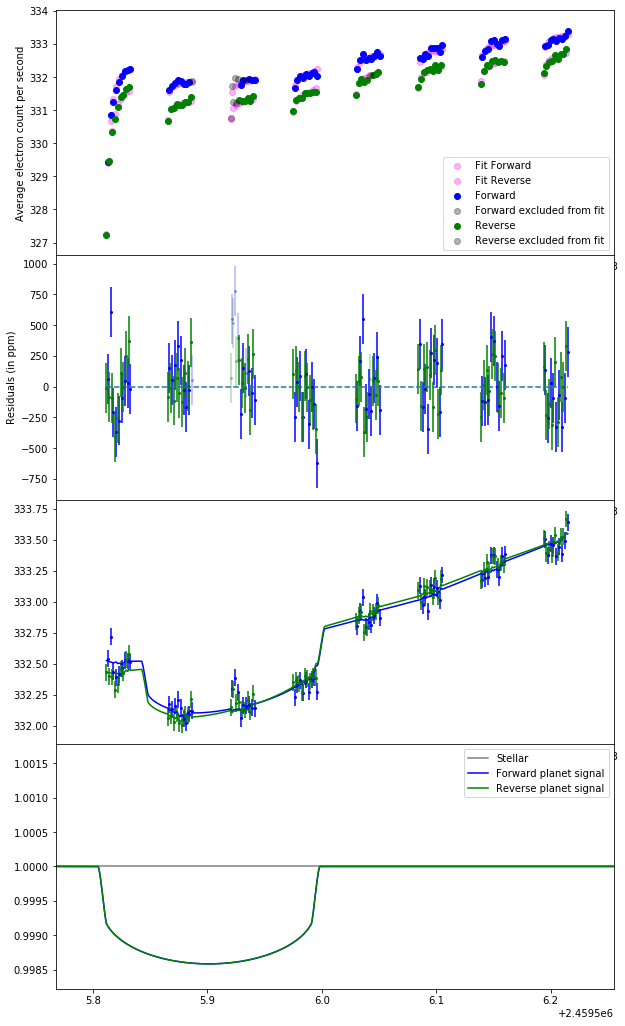

('Wavelength', array([1.26055321, 1.26521061, 1.26986804, 1.27452549, 1.27918297]))
Fitting a transit
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 12
    # data points      = 135
    # variables        = 12
    chi-square         = 163.247051
    reduced chi-square = 1.32721179
    Akaike info crit   = 49.6486397
    Bayesian info crit = 84.5119370
[[Variables]]
    depth_F:                  0.00102617 +/- 6.4380e-05 (6.27%) (init = 0.00147)
    depth_R:                  0.00102617 +/- 6.4380e-05 (6.27%) == 'depth_F'
    Mid_transit_time_offset:  0.126 (fixed)
    Inclination:              88.49 (fixed)
    Eccentricity:             0 (fixed)
    aRs:                      13.21402 (fixed)
    u1:                       0.58 (fixed)
    u2:                       0 (fixed)
    Phase_offset:             0 (fixed)
    V2_F:                     0.00235546 +/- 0.00107482 (45.63%) (init = -0.003)
    V2_R:                     0.00478064 +/- 0.00106519 (22.

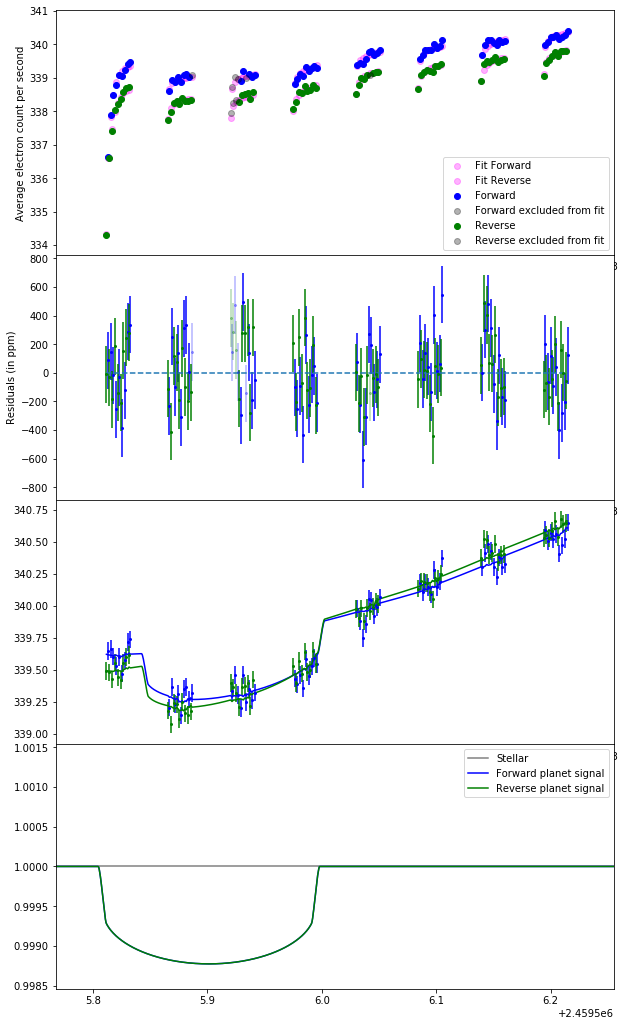

('Wavelength', array([1.28384048, 1.28849801, 1.29315557, 1.29781315, 1.30247076]))
Fitting a transit
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 11
    # data points      = 135
    # variables        = 12
    chi-square         = 148.966963
    reduced chi-square = 1.21111352
    Akaike info crit   = 37.2907200
    Bayesian info crit = 72.1540173
[[Variables]]
    depth_F:                  0.00115337 +/- 6.0861e-05 (5.28%) (init = 0.00147)
    depth_R:                  0.00115337 +/- 6.0861e-05 (5.28%) == 'depth_F'
    Mid_transit_time_offset:  0.126 (fixed)
    Inclination:              88.49 (fixed)
    Eccentricity:             0 (fixed)
    aRs:                      13.21402 (fixed)
    u1:                       0.58 (fixed)
    u2:                       0 (fixed)
    Phase_offset:             0 (fixed)
    V2_F:                     0.00226889 +/- 0.00101673 (44.81%) (init = -0.003)
    V2_R:                     0.00424927 +/- 0.00100756 (23.

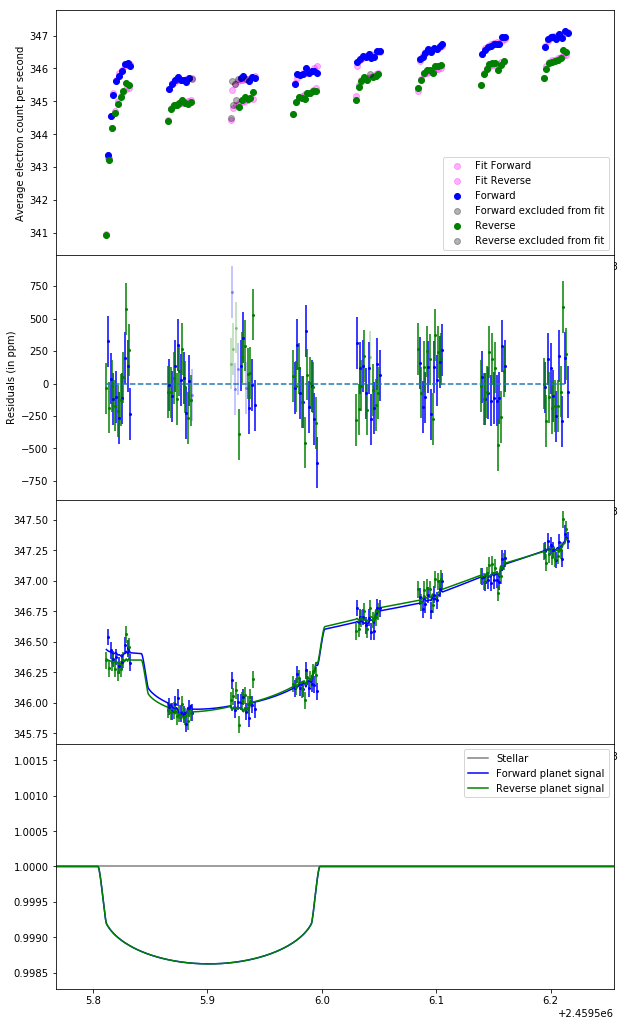

('Wavelength', array([1.30712839, 1.31178604, 1.31644372, 1.32110142, 1.32575914]))
Fitting a transit
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 6
    # data points      = 135
    # variables        = 12
    chi-square         = 233.712762
    reduced chi-square = 1.90010375
    Akaike info crit   = 98.0904393
    Bayesian info crit = 132.953737
[[Variables]]
    depth_F:                  0.00119052 +/- 7.5956e-05 (6.38%) (init = 0.00147)
    depth_R:                  0.00119052 +/- 7.5956e-05 (6.38%) == 'depth_F'
    Mid_transit_time_offset:  0.126 (fixed)
    Inclination:              88.49 (fixed)
    Eccentricity:             0 (fixed)
    aRs:                      13.21402 (fixed)
    u1:                       0.58 (fixed)
    u2:                       0 (fixed)
    Phase_offset:             0 (fixed)
    V2_F:                     7.2339e-04 +/- 0.00126870 (175.38%) (init = -0.003)
    V2_R:                     0.00513940 +/- 0.00125782 (24.

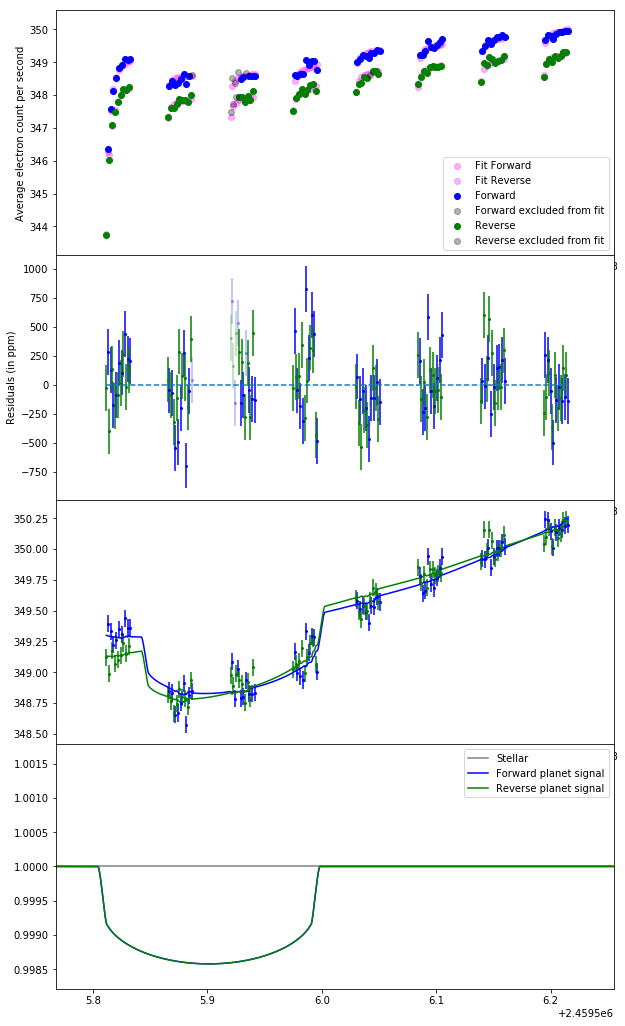

('Wavelength', array([1.33041688, 1.33507464, 1.33973242, 1.34439023, 1.34904805]))
Fitting a transit
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 6
    # data points      = 135
    # variables        = 12
    chi-square         = 173.591030
    reduced chi-square = 1.41130919
    Akaike info crit   = 57.9426927
    Bayesian info crit = 92.8059900
[[Variables]]
    depth_F:                  0.00123909 +/- 6.5729e-05 (5.30%) (init = 0.00147)
    depth_R:                  0.00123909 +/- 6.5729e-05 (5.30%) == 'depth_F'
    Mid_transit_time_offset:  0.126 (fixed)
    Inclination:              88.49 (fixed)
    Eccentricity:             0 (fixed)
    aRs:                      13.21402 (fixed)
    u1:                       0.58 (fixed)
    u2:                       0 (fixed)
    Phase_offset:             0 (fixed)
    V2_F:                     0.00142640 +/- 0.00109790 (76.97%) (init = -0.003)
    V2_R:                     0.00314194 +/- 0.00108794 (34.6

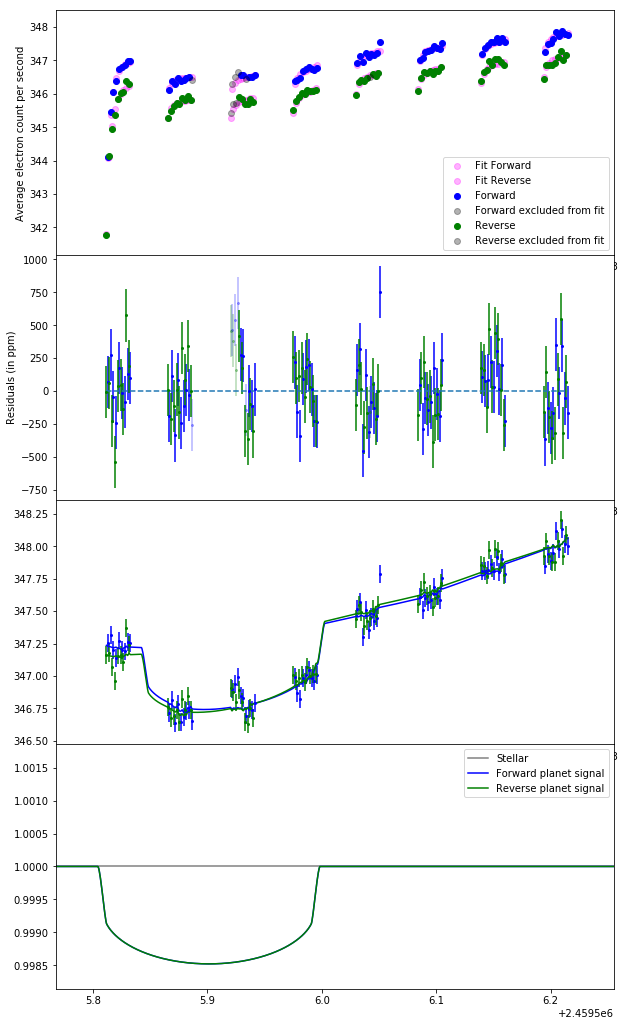

('Wavelength', array([1.35370589, 1.35836375, 1.36302163, 1.36767953, 1.37233744]))
Fitting a transit
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 6
    # data points      = 135
    # variables        = 12
    chi-square         = 201.321091
    reduced chi-square = 1.63675684
    Akaike info crit   = 77.9495534
    Bayesian info crit = 112.812851
[[Variables]]
    depth_F:                  0.00110938 +/- 7.1828e-05 (6.47%) (init = 0.00147)
    depth_R:                  0.00110938 +/- 7.1828e-05 (6.47%) == 'depth_F'
    Mid_transit_time_offset:  0.126 (fixed)
    Inclination:              88.49 (fixed)
    Eccentricity:             0 (fixed)
    aRs:                      13.21402 (fixed)
    u1:                       0.58 (fixed)
    u2:                       0 (fixed)
    Phase_offset:             0 (fixed)
    V2_F:                     3.1432e-04 +/- 0.00119843 (381.27%) (init = -0.003)
    V2_R:                     0.00302774 +/- 0.00118767 (39.

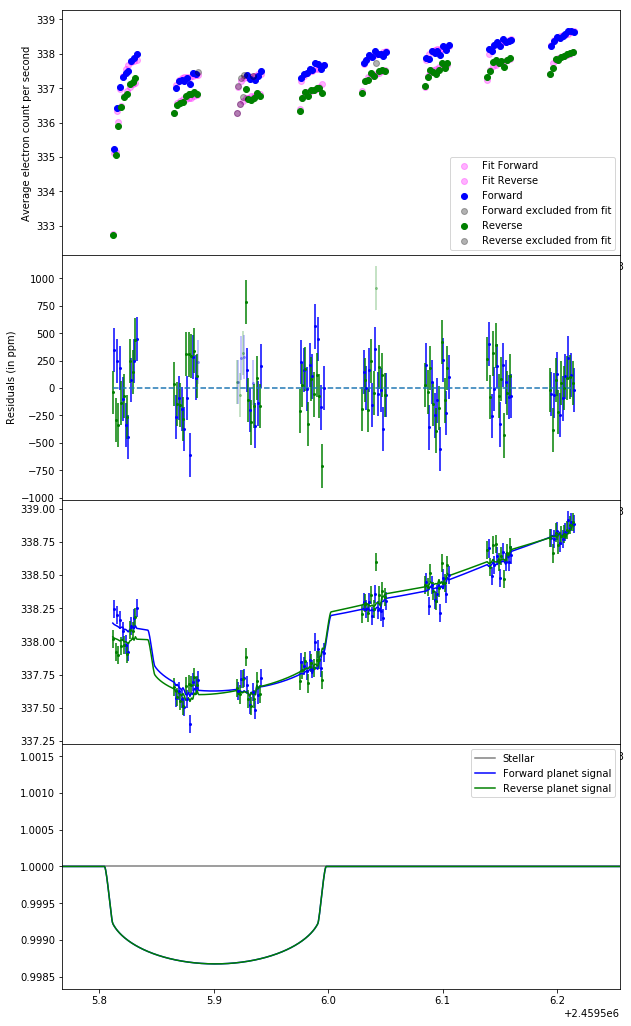

('Wavelength', array([1.37699538, 1.38165332, 1.38631129, 1.39096927, 1.39562726]))
Fitting a transit
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 7
    # data points      = 135
    # variables        = 12
    chi-square         = 174.699321
    reduced chi-square = 1.42031968
    Akaike info crit   = 58.8018592
    Bayesian info crit = 93.6651565
[[Variables]]
    depth_F:                  0.00119711 +/- 6.6792e-05 (5.58%) (init = 0.00147)
    depth_R:                  0.00119711 +/- 6.6792e-05 (5.58%) == 'depth_F'
    Mid_transit_time_offset:  0.126 (fixed)
    Inclination:              88.49 (fixed)
    Eccentricity:             0 (fixed)
    aRs:                      13.21402 (fixed)
    u1:                       0.58 (fixed)
    u2:                       0 (fixed)
    Phase_offset:             0 (fixed)
    V2_F:                     0.00119128 +/- 0.00111473 (93.57%) (init = -0.003)
    V2_R:                     0.00432135 +/- 0.00110473 (25.5

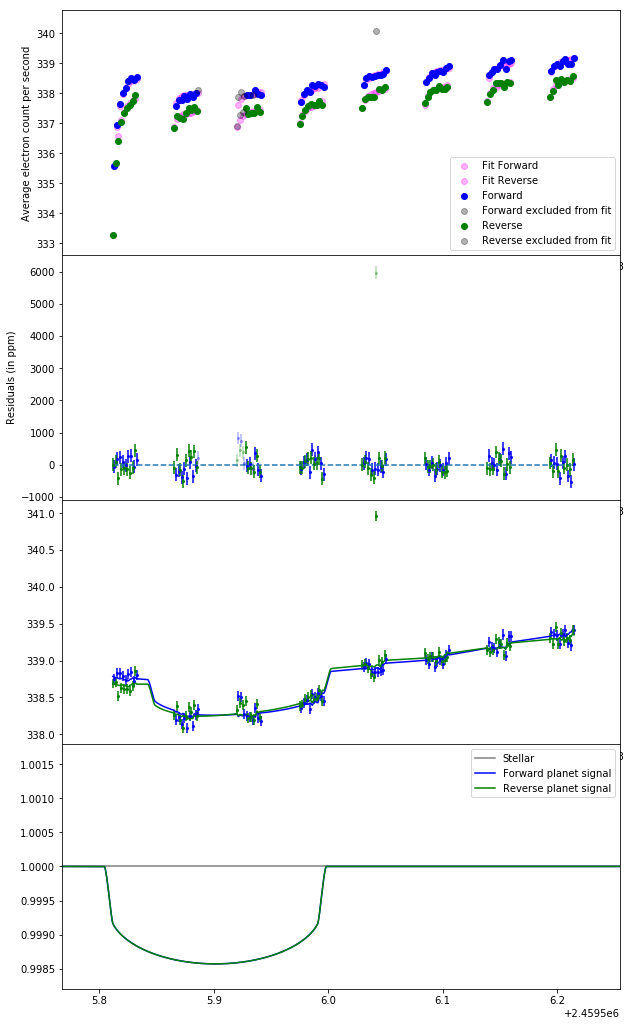

('Wavelength', array([1.40028527, 1.4049433 , 1.40960134, 1.41425939, 1.41891745]))
Fitting a transit
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 8
    # data points      = 135
    # variables        = 12
    chi-square         = 170.102255
    reduced chi-square = 1.38294516
    Akaike info crit   = 55.2018719
    Bayesian info crit = 90.0651692
[[Variables]]
    depth_F:                  0.00113716 +/- 6.6151e-05 (5.82%) (init = 0.00147)
    depth_R:                  0.00113716 +/- 6.6151e-05 (5.82%) == 'depth_F'
    Mid_transit_time_offset:  0.126 (fixed)
    Inclination:              88.49 (fixed)
    Eccentricity:             0 (fixed)
    aRs:                      13.21402 (fixed)
    u1:                       0.58 (fixed)
    u2:                       0 (fixed)
    Phase_offset:             0 (fixed)
    V2_F:                     7.0750e-04 +/- 0.00110370 (156.00%) (init = -0.003)
    V2_R:                     0.00186242 +/- 0.00109346 (58.

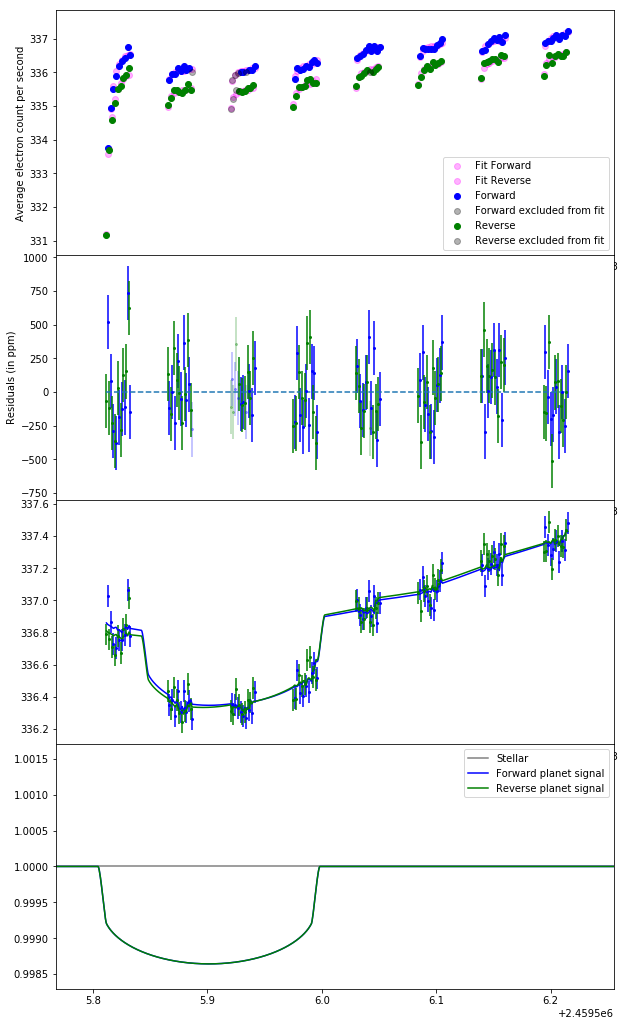

('Wavelength', array([1.42357553, 1.42823362, 1.43289172, 1.43754983, 1.44220796]))
Fitting a transit
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 11
    # data points      = 135
    # variables        = 12
    chi-square         = 167.780633
    reduced chi-square = 1.36407019
    Akaike info crit   = 53.3466500
    Bayesian info crit = 88.2099474
[[Variables]]
    depth_F:                  0.00119360 +/- 6.6172e-05 (5.54%) (init = 0.00147)
    depth_R:                  0.00119360 +/- 6.6172e-05 (5.54%) == 'depth_F'
    Mid_transit_time_offset:  0.126 (fixed)
    Inclination:              88.49 (fixed)
    Eccentricity:             0 (fixed)
    aRs:                      13.21402 (fixed)
    u1:                       0.58 (fixed)
    u2:                       0 (fixed)
    Phase_offset:             0 (fixed)
    V2_F:                     4.6263e-04 +/- 0.00110352 (238.53%) (init = -0.003)
    V2_R:                     0.00232023 +/- 0.00109333 (47

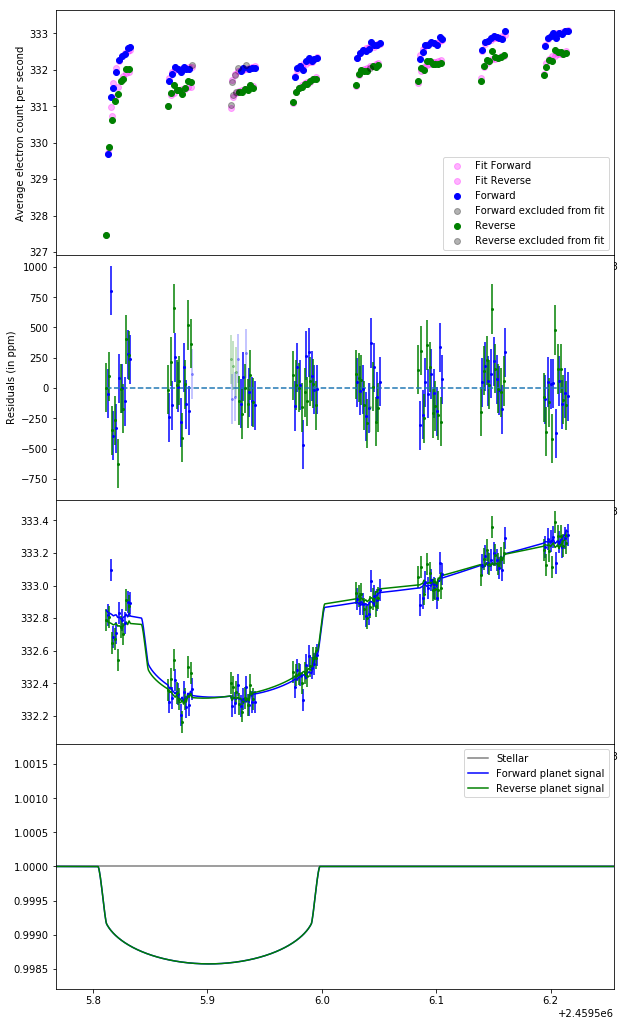

('Wavelength', array([1.44686609, 1.45152423, 1.45618239, 1.46084055, 1.46549872]))
Fitting a transit
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 18
    # data points      = 135
    # variables        = 12
    chi-square         = 151.211992
    reduced chi-square = 1.22936579
    Akaike info crit   = 39.3100793
    Bayesian info crit = 74.1733766
[[Variables]]
    depth_F:                  0.00119607 +/- 6.3838e-05 (5.34%) (init = 0.00147)
    depth_R:                  0.00119607 +/- 6.3838e-05 (5.34%) == 'depth_F'
    Mid_transit_time_offset:  0.126 (fixed)
    Inclination:              88.49 (fixed)
    Eccentricity:             0 (fixed)
    aRs:                      13.21402 (fixed)
    u1:                       0.58 (fixed)
    u2:                       0 (fixed)
    Phase_offset:             0 (fixed)
    V2_F:                    -0.00148129 +/- 0.00106292 (71.76%) (init = -0.003)
    V2_R:                     0.00138990 +/- 0.00105323 (75.

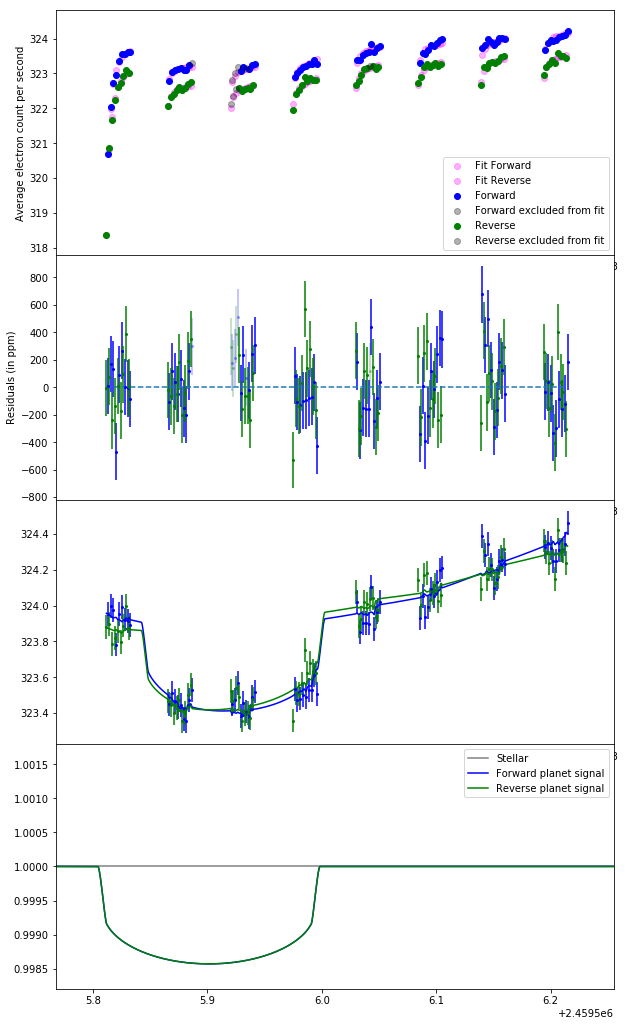

('Wavelength', array([1.4701569 , 1.47481508, 1.47947328, 1.48413148, 1.48878968]))
Fitting a transit
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 16
    # data points      = 135
    # variables        = 12
    chi-square         = 150.168248
    reduced chi-square = 1.22088007
    Akaike info crit   = 38.3750080
    Bayesian info crit = 73.2383053
[[Variables]]
    depth_F:                  0.00110348 +/- 6.4055e-05 (5.80%) (init = 0.00147)
    depth_R:                  0.00110348 +/- 6.4055e-05 (5.80%) == 'depth_F'
    Mid_transit_time_offset:  0.126 (fixed)
    Inclination:              88.49 (fixed)
    Eccentricity:             0 (fixed)
    aRs:                      13.21402 (fixed)
    u1:                       0.58 (fixed)
    u2:                       0 (fixed)
    Phase_offset:             0 (fixed)
    V2_F:                    -0.00159340 +/- 0.00106588 (66.89%) (init = -0.003)
    V2_R:                     0.00139541 +/- 0.00105617 (75.

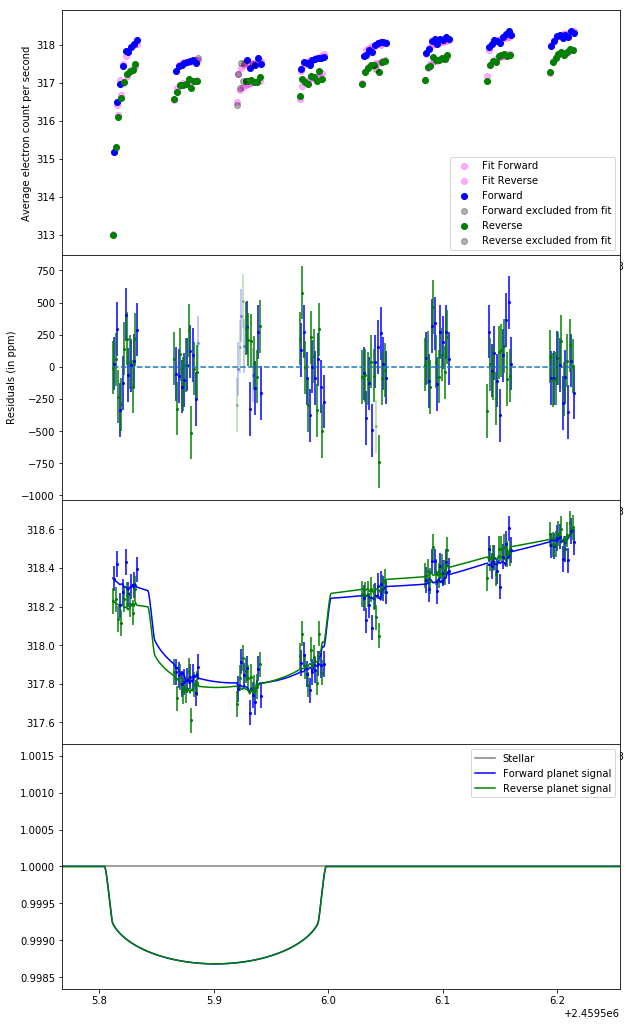

('Wavelength', array([1.4934479 , 1.49810612, 1.50276434, 1.50742257, 1.5120808 ]))
Fitting a transit
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 10
    # data points      = 135
    # variables        = 12
    chi-square         = 165.862415
    reduced chi-square = 1.34847492
    Akaike info crit   = 51.7943185
    Bayesian info crit = 86.6576159
[[Variables]]
    depth_F:                  0.00118338 +/- 6.7253e-05 (5.68%) (init = 0.00147)
    depth_R:                  0.00118338 +/- 6.7253e-05 (5.68%) == 'depth_F'
    Mid_transit_time_offset:  0.126 (fixed)
    Inclination:              88.49 (fixed)
    Eccentricity:             0 (fixed)
    aRs:                      13.21402 (fixed)
    u1:                       0.58 (fixed)
    u2:                       0 (fixed)
    Phase_offset:             0 (fixed)
    V2_F:                    -0.00149867 +/- 0.00111914 (74.68%) (init = -0.003)
    V2_R:                    -0.00114793 +/- 0.00110860 (96.

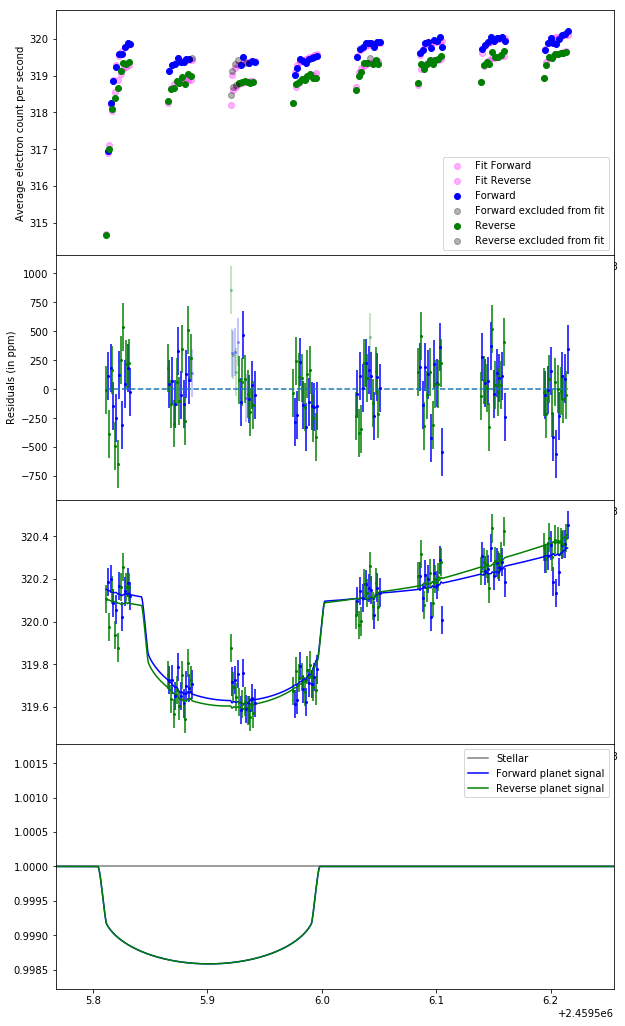

('Wavelength', array([1.51673903, 1.52139727, 1.52605551, 1.53071376, 1.535372  ]))
Fitting a transit
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 11
    # data points      = 135
    # variables        = 12
    chi-square         = 123.831204
    reduced chi-square = 1.00675776
    Akaike info crit   = 12.3420214
    Bayesian info crit = 47.2053187
[[Variables]]
    depth_F:                  0.00111626 +/- 5.9078e-05 (5.29%) (init = 0.00147)
    depth_R:                  0.00111626 +/- 5.9078e-05 (5.29%) == 'depth_F'
    Mid_transit_time_offset:  0.126 (fixed)
    Inclination:              88.49 (fixed)
    Eccentricity:             0 (fixed)
    aRs:                      13.21402 (fixed)
    u1:                       0.58 (fixed)
    u2:                       0 (fixed)
    Phase_offset:             0 (fixed)
    V2_F:                    -0.00317388 +/- 9.8183e-04 (30.93%) (init = -0.003)
    V2_R:                    -0.00141807 +/- 9.7266e-04 (68.

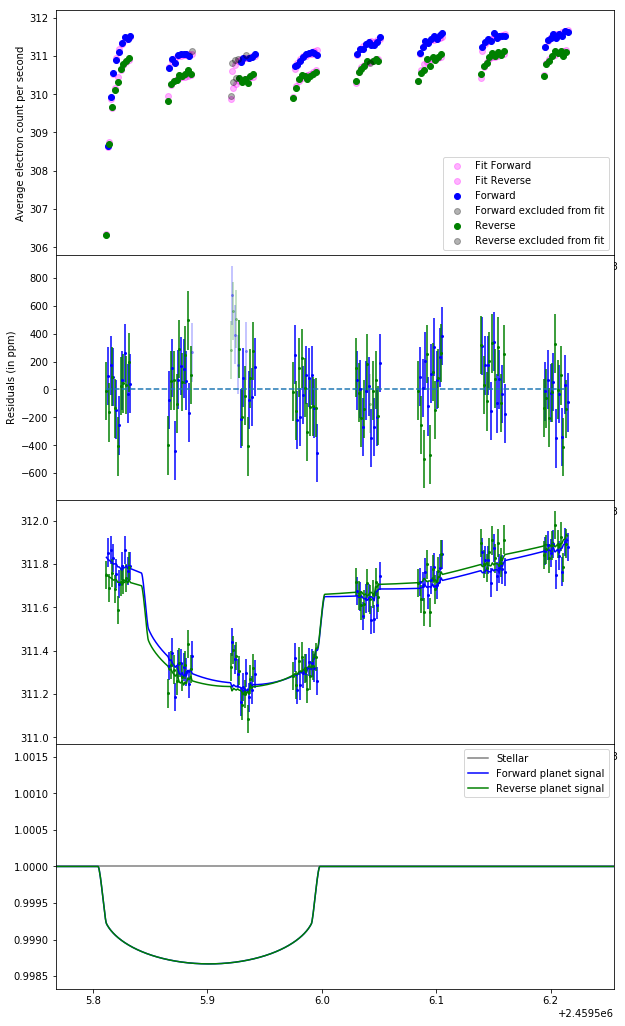

('Wavelength', array([1.54003025, 1.5446885 , 1.54934675, 1.554005  , 1.55866325]))
Fitting a transit
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 15
    # data points      = 135
    # variables        = 12
    chi-square         = 210.983647
    reduced chi-square = 1.71531420
    Akaike info crit   = 84.2782895
    Bayesian info crit = 119.141587
[[Variables]]
    depth_F:                  0.00104399 +/- 7.9039e-05 (7.57%) (init = 0.00147)
    depth_R:                  0.00104399 +/- 7.9039e-05 (7.57%) == 'depth_F'
    Mid_transit_time_offset:  0.126 (fixed)
    Inclination:              88.49 (fixed)
    Eccentricity:             0 (fixed)
    aRs:                      13.21402 (fixed)
    u1:                       0.58 (fixed)
    u2:                       0 (fixed)
    Phase_offset:             0 (fixed)
    V2_F:                    -0.00419619 +/- 0.00131098 (31.24%) (init = -0.003)
    V2_R:                    -0.00120609 +/- 0.00129890 (107

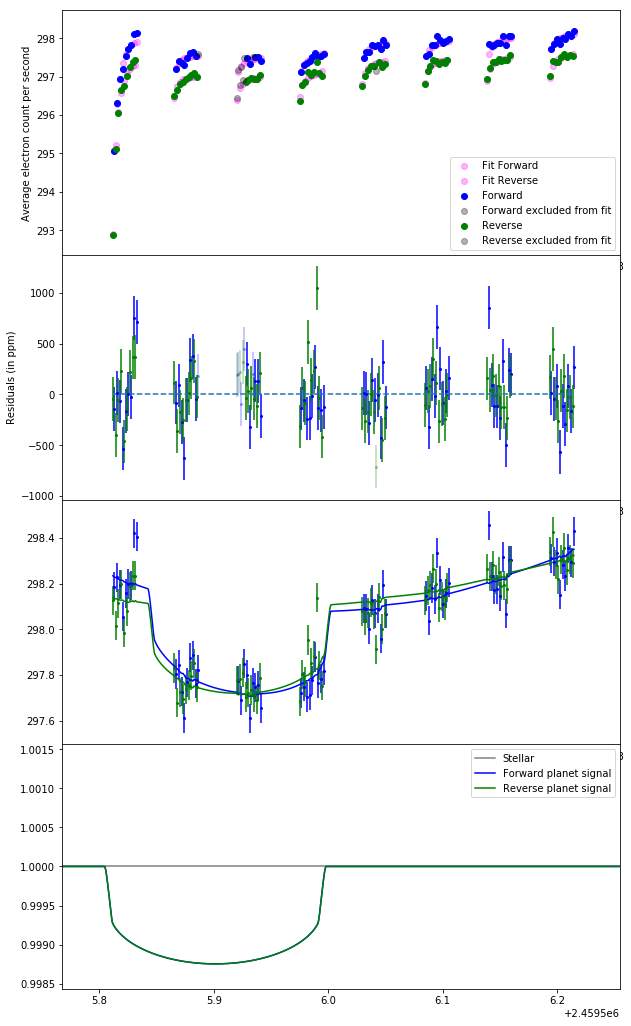

('Wavelength', array([1.5633215 , 1.56797974, 1.57263799, 1.57729623, 1.58195447]))
Fitting a transit
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 9
    # data points      = 135
    # variables        = 12
    chi-square         = 167.432830
    reduced chi-square = 1.36124252
    Akaike info crit   = 53.0665092
    Bayesian info crit = 87.9298066
[[Variables]]
    depth_F:                  8.2256e-04 +/- 7.1253e-05 (8.66%) (init = 0.00147)
    depth_R:                  8.2256e-04 +/- 7.1253e-05 (8.66%) == 'depth_F'
    Mid_transit_time_offset:  0.126 (fixed)
    Inclination:              88.49 (fixed)
    Eccentricity:             0 (fixed)
    aRs:                      13.21402 (fixed)
    u1:                       0.58 (fixed)
    u2:                       0 (fixed)
    Phase_offset:             0 (fixed)
    V2_F:                    -0.00330643 +/- 0.00118096 (35.72%) (init = -0.003)
    V2_R:                    -0.00230892 +/- 0.00116962 (50.6

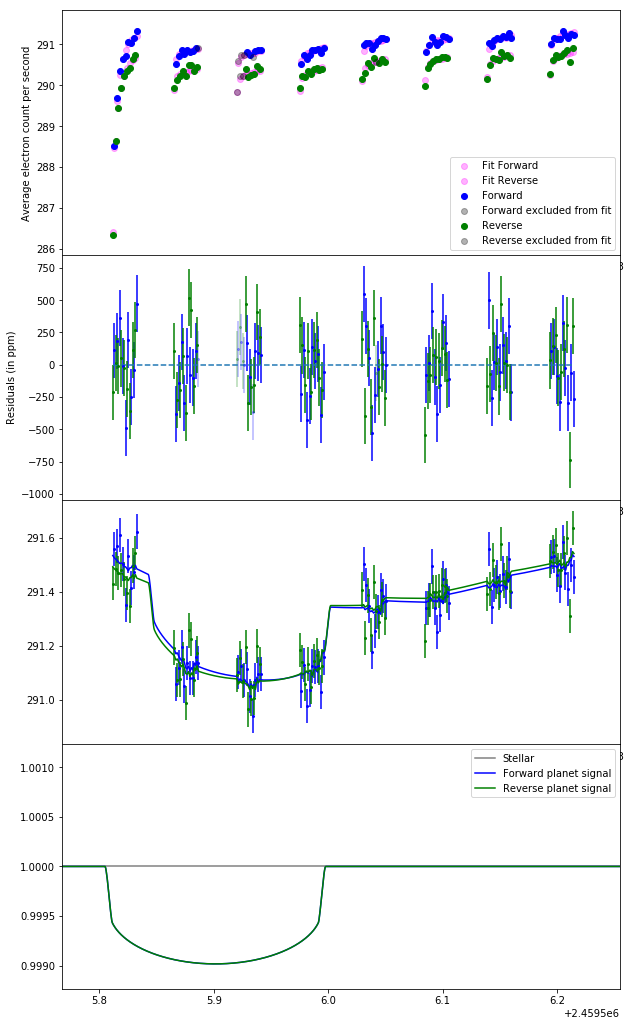

('Wavelength', array([1.58661271, 1.59127094, 1.59592917, 1.6005874 , 1.60524562]))
Fitting a transit
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 12
    # data points      = 135
    # variables        = 12
    chi-square         = 176.761448
    reduced chi-square = 1.43708494
    Akaike info crit   = 60.3860495
    Bayesian info crit = 95.2493469
[[Variables]]
    depth_F:                  0.00110271 +/- 7.4701e-05 (6.77%) (init = 0.00147)
    depth_R:                  0.00110271 +/- 7.4701e-05 (6.77%) == 'depth_F'
    Mid_transit_time_offset:  0.126 (fixed)
    Inclination:              88.49 (fixed)
    Eccentricity:             0 (fixed)
    aRs:                      13.21402 (fixed)
    u1:                       0.58 (fixed)
    u2:                       0 (fixed)
    Phase_offset:             0 (fixed)
    V2_F:                    -0.00539826 +/- 0.00123611 (22.90%) (init = -0.003)
    V2_R:                    -0.00305872 +/- 0.00122453 (40.

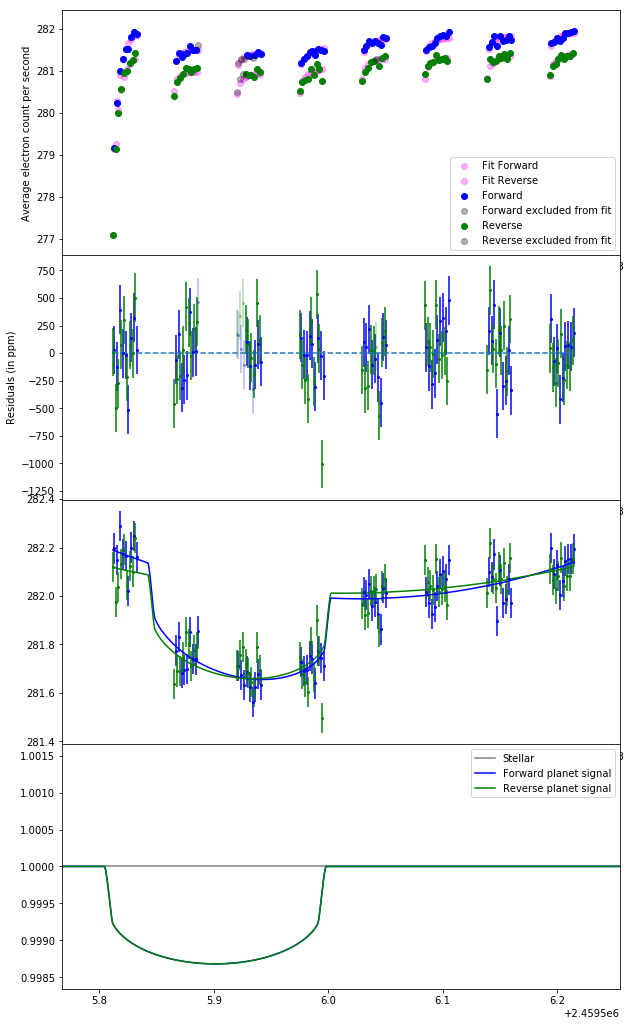

('Wavelength', array([1.60990384, 1.61456205, 1.61922025, 1.62387845, 1.62853664]))
Fitting a transit
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 7
    # data points      = 135
    # variables        = 12
    chi-square         = 198.009244
    reduced chi-square = 1.60983125
    Akaike info crit   = 75.7102564
    Bayesian info crit = 110.573554
[[Variables]]
    depth_F:                  0.00107434 +/- 8.1473e-05 (7.58%) (init = 0.00147)
    depth_R:                  0.00107434 +/- 8.1473e-05 (7.58%) == 'depth_F'
    Mid_transit_time_offset:  0.126 (fixed)
    Inclination:              88.49 (fixed)
    Eccentricity:             0 (fixed)
    aRs:                      13.21402 (fixed)
    u1:                       0.58 (fixed)
    u2:                       0 (fixed)
    Phase_offset:             0 (fixed)
    V2_F:                    -0.00188294 +/- 0.00134616 (71.49%) (init = -0.003)
    V2_R:                    -0.00106935 +/- 0.00133322 (124.

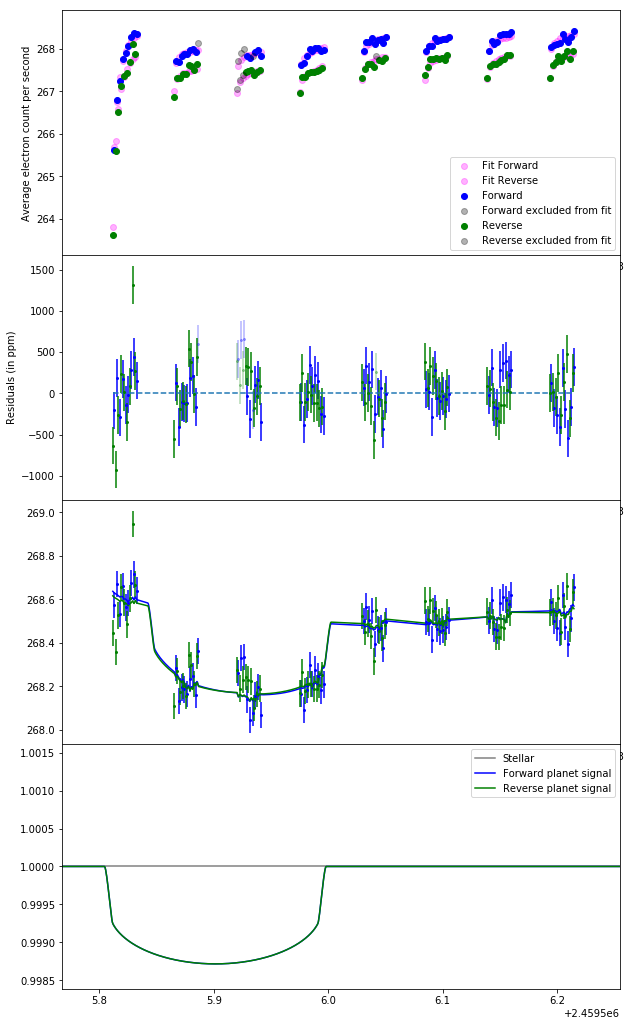

('Wavelength', array([1.63319482, 1.637853  , 1.64251117, 1.64716933, 1.65182748]))


In [124]:
reload(fit_fns)
Planet_LC_multi = fit_fns.Planet('V1298c')
t0 = Planet_LC_multi.sp_params.t0
while t0 < min(Times_org) + Planet_LC_multi.sp_params.per:
    t0 += Planet_LC_multi.sp_params.per
t0 -= 2 * Planet_LC_multi.sp_params.per


Excl_first = np.ones_like(sorted_times, dtype=bool)
#Excl_first[Fir] = False
#Excl_first[Sec]=False
#n0=len(Thi)-1
#print (Thi[n0-3:])
#Excl_first[Thi[n0-3:]]=False
exc_indices=[]
#exc_indices.extend(Fir)
#exc_indices.extend(Sec)
#exc_indices.extend(For)
#exc_indices.extend(Fif)
#exc_indices.extend(Sev)
#exc_indices.extend(Eig)
#exc_indices.extend(Thi)
lis=[82,36,37,38,39,40,41,35,47]
#lis=[82]
exc_indices.extend(lis)
RpRs2 = []
RpRs2_err = []
opt_cs = []
err_cs = []
noise = []
photonnoise = []

bic=[]
x_shift=[]
x_shift_err=[]
cov=[]
limb=[]
limb_err=[]
Residuals=[]
Errors=[]
rms=[]
for i,wave_bin in enumerate(bins):
    Binned_LC, Binned_LC_err = fit_fns.calc_WL(df_sorted, df_sorted_err, wave_bin, average=True, weighted=False)
    Binned_LC = Binned_LC / imagesize
    Binned_LC_err = Binned_LC_err / imagesize
    Binned_LC_full, Binned_LC_full_err = Binned_LC.copy(), Binned_LC_err.copy()
    Binned_LC_err /= np.max(Binned_LC)
    Binned_LC /= np.max(Binned_LC)
    opt_c, err_c, chi2_c, bic_c,out,ec_lc,Residue,errs,x,mean_residue = Planet_LC_multi.Fit_with_recte_lmfit(sorted_times[Excl_first] + min(Times_org), 
                                                           Binned_LC_full[Excl_first], Binned_LC_full_err[Excl_first], Transit_orb,
                                                           np.array(Orbit_times) + min(Times_org), 
                                                           Forwardscanned[Excl_first],data_xshift[:144], 
                                                           fix_limb_dark=True, limb_dark='linear',u1=u11, u2=u22,
                                                           fix_inclination=True,
                                                           fix_eccentricity=True, separate_depth=False,
                                                           nosat=True,
                                                           deltat=deltat, a=aRs, fix_aRs=True,
                                                           t0=t0, exptime = exptime, exc_indices=exc_indices,
                                                           verbose=True,polynomial=True,vary_cxshift=True,order=2,
                                                           Transit=True,vary_recte=True,E0_s=e_os,E0_f=e_of,Delta_Es=del_es,Delta_Ef=del_ef,c_xshift=cx)
    RpRs2.append(opt_c[0])
    RpRs2_err.append(err_c[1])
    opt_cs.append(opt_c)
    err_cs.append(err_c)
 #   print (opt_c[0],err_c[0])
    fit_opt = opt_c[:-3]
#    print (opt_c[-1],err_c[-1])
    print ('Wavelength',wave_bin)
    x_shift.append(opt_c[-1])
    x_shift_err.append(err_c[-1])
    bic.append(bic_c)
#    cov.append(out.covar[11][0])
    limb.append(opt_c[6])
    limb_err.append(err_c[6])
    Residuals.append(Residue)
    Errors.append(errs)
    rms.append(mean_residue/(43.096*np.sqrt(N_bins)))
'''

    LC_new = Planet_LC_multi.func(sorted_times[Excl_first] + min(Times_org), *fit_opt,
                                                                          Forward=Forwardscanned[Excl_first],
                                                                          sp_params=Planet_LC.sp_params,
                                                                          orbit_times=Planet_LC.orbit_times,
                                                                          satellite_time=Planet_LC.satellite_time,
                                                                          Include=Planet_LC.exc_array, 
                                                                          exptime=exptime,
                                                                          noexcl=Planet_LC.noexcl,
                                                                          Stel_puls_phase=opt[-3],
                                                                          Stel_puls_amp=opt[-2], Harm_amp=opt[-1],
                                                                          fit=False)[0]


    noise.append(np.sqrt(np.sum((Binned_LC_full[Excl_first] - LC_new)**2./ Binned_LC_full[Excl_first]**2.) / len(Binned_LC_full[Excl_first])) *1.e6)
    photonnoise.append(1. / np.sqrt(np.mean(Binned_LC_full[Excl_first] * len(wave_bin) * imagesize * exptime)) * 1.e6)



'''
RpRs2 = np.array(RpRs2)
RpRs2_err = np.array(RpRs2_err)



#print (RpRs2_err)
#print (err_c,opt_c[0])



<ErrorbarContainer object of 3 artists>

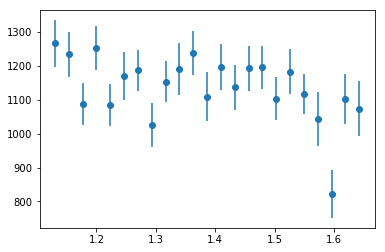

In [125]:
import matplotlib.pyplot as plt
plt.errorbar(bins_avg_wave,(RpRs2)*1e6,yerr=RpRs2_err*1e6,ls='none',marker='o')

[1.1208431046880223, 1.1092343907947084, 1.0352403750116916, 1.0783670771902092, 1.025507859283102, 1.186476804002815, 1.013888727746864, 1.0700206803884262, 1.012651270482914, 1.2640106088860785, 1.0935250961691767, 1.193877751112842, 1.1102089866014362, 1.099316779785462, 1.0992422094249887, 1.058337360610451, 1.0612726739809113, 1.1145334851154673, 0.9776006200232489, 1.3038214932414947, 1.174188360654945, 1.2286654559384538, 1.3355525506283412]


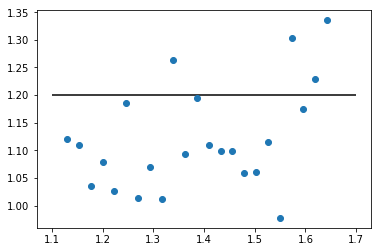

In [126]:
print (rms)
plt.plot (bins_avg_wave,rms,ls='none',marker='o')
plt.hlines(1.20,1.1,1.7)

In [86]:
import os
import numpy as np
filelist=[]

for file in os.listdir("/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_tauc/output"):
    if (file.startswith("iei") and file.endswith(".txt") and not file.endswith("subs_spec.txt")):
        #print(os.path.join("/mydir", file))
        filelist.append(file)
print (filelist)

['iei401e8q_spec.txt', 'iei401duq_spec.txt', 'iei401geq_spec.txt', 'iei401faq_spec.txt', 'iei401eqq_spec.txt', 'iei401h5q_spec.txt', 'iei401gpq_spec.txt', 'iei401g9q_spec.txt', 'iei401ftq_spec.txt', 'iei401edq_spec.txt', 'iei401e5q_spec.txt', 'iei401crq_spec.txt', 'iei401ghq_spec.txt', 'iei401dxq_spec.txt', 'iei401flq_spec.txt', 'iei401h8q_spec.txt', 'iei401dmq_spec.txt', 'iei401hdq_spec.txt', 'iei401f0q_spec.txt', 'iei401g4q_spec.txt', 'iei401eiq_spec.txt', 'iei401fyq_spec.txt', 'iei401dfq_spec.txt', 'iei401gvq_spec.txt', 'iei401ebq_spec.txt', 'iei401cyq_spec.txt', 'iei401h3q_spec.txt', 'iei401fgq_spec.txt', 'iei401ewq_spec.txt', 'iei401hbq_spec.txt', 'iei401dkq_spec.txt', 'iei401eoq_spec.txt', 'iei401g2q_spec.txt', 'iei401gnq_spec.txt', 'iei401e3q_spec.txt', 'iei401d7q_spec.txt', 'iei401ezq_spec.txt', 'iei401fjq_spec.txt', 'iei401epq_spec.txt', 'iei401h4q_spec.txt', 'iei401e9q_spec.txt', 'iei401g8q_spec.txt', 'iei401fuq_spec.txt', 'iei401gqq_spec.txt', 'iei401h9q_spec.txt', 'iei401d0

In [49]:
from scipy.integrate import simps
import linecache
#w0,f0=np.loadtxt('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_taub/output/ie93a1clq_spec.txt',skiprows=2,usecols=(0,1),unpack=True)
I=np.array([])
I1=np.array([])
time=np.array([])
#print (sorted(filelist))
#I=simps(f0,w0)
flux_tot=np.array([])
for file in sorted(filelist):
    w0,f0=np.loadtxt('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_tauc/output/'+file,skiprows=2,usecols=(0,1),unpack=True)
#    w0,f0=np.loadtxt('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_taub/output/'+file,skiprows=2,usecols=(0,1),unpack=True)
    t0=linecache.getline('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_tauc/output/'+file,2)
    t0=t0.split()
 #   print (t0)
    t=np.float64(t0[1])
 #   print (t0)
    time=np.append(time,t)
    f_temp=f0[np.where(w0>1.5)[0]]
    w_temp=w0[np.where(w0>1.5)[0]]
    f_temp=f_temp[np.where(w_temp<1.65)[0]]
    w_temp=w_temp[np.where(w_temp<1.65)[0]]
    I00=simps(f_temp,w_temp)
    #print (len(w_temp))
    f_temp=f0[np.where(w0>1.18)[0]]
    w_temp=w0[np.where(w0>1.18)[0]]
    f_temp=f_temp[np.where(w_temp<1.28)[0]]
    w_temp=w_temp[np.where(w_temp<1.28)[0]]
    I11=simps(f_temp,w_temp)
    f_temp=f0[np.where(w0>1.45)[0]]
    w_temp=w0[np.where(w0>1.45)[0]]
    f_temp=f_temp[np.where(w_temp<1.55)[0]]
    w_temp=w_temp[np.where(w_temp<1.55)[0]]
    I01=simps(f_temp,w_temp)
    I=np.append(I,I00/I01)
    I1=np.append(I1,I11/I01)
    f_temp=f0[np.where(w0>1.15)[0]]
    w_temp=w0[np.where(w0>1.15)[0]]
    f_temp=f_temp[np.where(w_temp<1.65)[0]]
    w_temp=w_temp[np.where(w_temp<1.65)[0]]
    flux_tot=np.append(flux_tot,simps(f_temp,w_temp))
time=sorted(time)
time=time-time[0]
#print (I00/I01)
#print (sorted(filelist),len(sorted_times))



(array(['iei401cwq_spec.txt'], dtype='|S18'), array(['iei401heq_spec.txt'], dtype='|S18'))


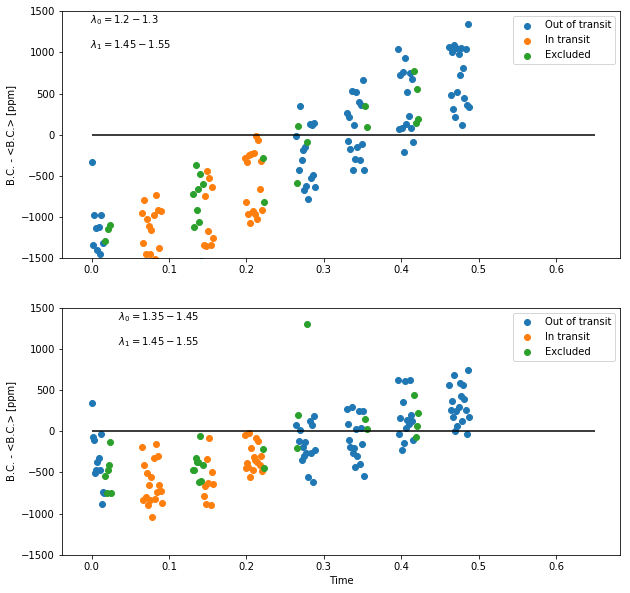

In [50]:
#plt.scatter(sorted_times,(I-np.median(I))*1e6)
Exclude_first=np.ones(len(time),dtype=bool)
#Exclude_first[Fir]=False
#Exclude_first[153]=False
#Exclude_first[For]=False
#lis1=[139,140,141,142,143]
#lis1=lis1+18
Exclude_first[lis1]=False
#Exclude_first[Sev]=False
#Exclude_first[Sec]=False
#Exclude_first[Sec]=False
excl_lis=[]
#excl_lis.extend(Fir)
excl_lis.extend(Sec)
excl_lis.extend(Thi)
excl_lis.extend(For)
#excl_lis.extend(Sev)
#excl_lis.extend(Thi)
#excl_lis.extend(Sec)
#excl_lis.append(153)
filelist_temp=np.array(sorted(filelist))
#print (np.array(filelist2)[inc],filelist[inc])
#filelist2=sorted(filelist[inc])
#print (filelist2[inc])

inc=np.ones(len(sorted_times),dtype=bool)
inc[excl_lis]=False

fig, axs = plt.subplots(2, 1,figsize=(10,10))

filelist2=filelist_temp[inc*Exclude_first]
axs[0].scatter(time[inc*Exclude_first],(I1[inc*Exclude_first]-np.mean(I1[inc*Exclude_first]))*1e6,label='Out of transit')
axs[1].scatter(time[inc*Exclude_first],(I[inc*Exclude_first]-np.mean(I[inc*Exclude_first]))*1e6,label='Out of transit')
#print (I[inc]-np.mean(I[inc]))*1e6
print (filelist2[np.where(I[inc*Exclude_first]==min(I[inc*Exclude_first]))[0]],filelist2[np.where(I[inc*Exclude_first]==max(I[inc*Exclude_first]))[0]])
axs[0].scatter(time[~inc*Exclude_first],(I1[~inc*Exclude_first]-np.mean(I1[inc*Exclude_first]))*1e6,label='In transit')
axs[1].scatter(time[~inc*Exclude_first],(I[~inc*Exclude_first]-np.mean(I[inc*Exclude_first]))*1e6,label='In transit')
#axs[0].set_xlim(0.0,0.65)
#axs[1].set_xlim(0,0,0.65)
axs[0].set_ylabel('B.C. - <B.C.> [ppm]')
axs[1].set_ylabel('B.C. - <B.C.> [ppm]')
plt.xlabel('Time')
axs[0].set_ylim(-1500,1500)
axs[1].set_ylim(-1500,1500)
#plt.ylim(min(I),max(I))
axs[0].hlines(0.0,0.0,0.65)
axs[1].hlines(0.0,0.0,0.65)
#print (np.mean(I[inc]))


axs[0].annotate(r'${\lambda}_{0}=1.2-1.3$', xy=(0.05, 0.95), xycoords='axes fraction')
axs[0].annotate(r'${\lambda}_{1}=1.45-1.55$', xy=(0.05, 0.85), xycoords='axes fraction')
axs[1].annotate(r'${\lambda}_{0}=1.35-1.45$', xy=(0.1, 0.95), xycoords='axes fraction')
axs[1].annotate(r'${\lambda}_{1}=1.45-1.55$', xy=(0.1, 0.85), xycoords='axes fraction')
axs[1].scatter(time[~Exclude_first],(I[~Exclude_first]-np.mean(I[inc*Exclude_first]))*1e6,label='Excluded')
axs[0].scatter(time[~Exclude_first],(I1[~Exclude_first]-np.mean(I1[inc*Exclude_first]))*1e6,label='Excluded')
axs[0].legend()
axs[1].legend()
#plt.savefig('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_taub/output/Blueness_color_v1298_exclude_second.pdf',format='pdf')

In [95]:
from scipy.integrate import simps
import linecache
#w0,f0=np.loadtxt('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_taub/output/ie93a1clq_spec.txt',skiprows=2,usecols=(0,1),unpack=True)
I=np.array([])
I1=np.array([])
time=np.array([])
#print (sorted(filelist))
#I=simps(f0,w0)
flux_tot=np.array([])
for file in sorted(filelist):
    w0,f0=np.loadtxt('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_tauc/output/'+file,skiprows=2,usecols=(0,1),unpack=True)
#    w0,f0=np.loadtxt('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_taub/output/'+file,skiprows=2,usecols=(0,1),unpack=True)
    t0=linecache.getline('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_tauc/output/'+file,2)
    t0=t0.split()
 #   print (t0)
    t=np.float64(t0[1])
 #   print (t0)
    time=np.append(time,t)
    f_temp=f0[np.where(w0>1.3)[0]]
    w_temp=w0[np.where(w0>1.3)[0]]
    f_temp=f_temp[np.where(w_temp<1.4)[0]]
    w_temp=w_temp[np.where(w_temp<1.4)[0]]
    I00=simps(f_temp,w_temp)
    #print (len(w_temp))
    f_temp=f0[np.where(w0>1.2)[0]]
    w_temp=w0[np.where(w0>1.2)[0]]
    f_temp=f_temp[np.where(w_temp<1.3)[0]]
    w_temp=w_temp[np.where(w_temp<1.3)[0]]
    I11=simps(f_temp,w_temp)
    I1=np.append(I1,I00/I11)
    

144
144


"\naxs.annotate(r'${\\lambda}_{0}=1.2-1.3$', xy=(0.05, 0.95), xycoords='axes fraction')\naxs[0].annotate(r'${\\lambda}_{1}=1.45-1.55$', xy=(0.05, 0.85), xycoords='axes fraction')\naxs[1].annotate(r'${\\lambda}_{0}=1.35-1.45$', xy=(0.1, 0.95), xycoords='axes fraction')\naxs[1].annotate(r'${\\lambda}_{1}=1.45-1.55$', xy=(0.1, 0.85), xycoords='axes fraction')\naxs[1].scatter(time[~Exclude_first],(I[~Exclude_first]-np.mean(I[inc*Exclude_first]))*1e6,label='Excluded')\naxs[0].scatter(time[~Exclude_first],(I1[~Exclude_first]-np.mean(I1[inc*Exclude_first]))*1e6,label='Excluded')\naxs[0].legend()\naxs[1].legend()\n"

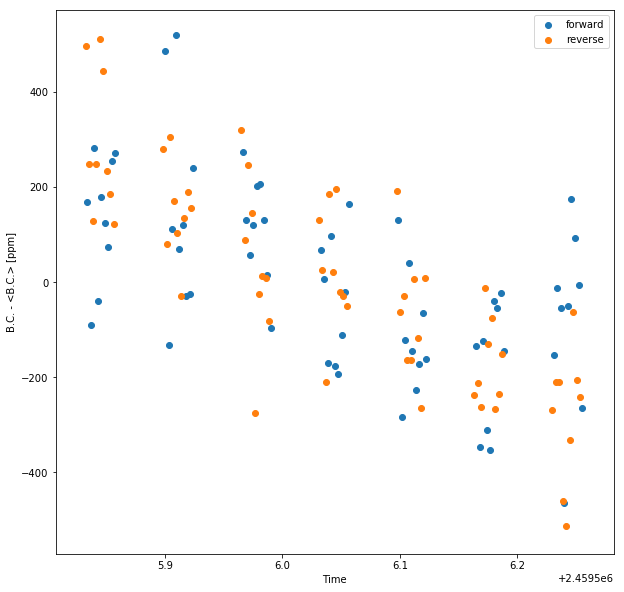

In [96]:
#plt.scatter(sorted_times,(I-np.median(I))*1e6)
#time=np.ones(144)
Exclude_first=np.ones(len(time),dtype=bool)
print (len(time))
Exclude_first[Fir]=False
#Exclude_first[153]=False
#Exclude_first[For]=False
#lis1=[139,140,141,142,143]
#lis1=lis1+18
#Exclude_first[lis1]=False
#Exclude_first[Sev]=False
#Exclude_first[Sec]=False
#Exclude_first[Sec]=False
excl_lis=[]
#excl_lis.extend(Fir)
#excl_lis.extend(Sec)
#excl_lis.extend(Thi)
#excl_lis.extend(For)
#excl_lis.extend(Sev)
#excl_lis.extend(Thi)
#excl_lis.extend(Sec)
#excl_lis.append(153)
filelist_temp=np.array(sorted(filelist))
#print (np.array(filelist2)[inc],filelist[inc])
#filelist2=sorted(filelist[inc])
#print (filelist2[inc])

inc=np.ones(len(time),dtype=bool)
print (len(sorted_times))
inc[excl_lis]=False

fig, axs = plt.subplots(1, 1,figsize=(10,10))

filelist2=filelist_temp[inc*Exclude_first]
axs.scatter(time[inc*Exclude_first*Forwardscanned],(I1[inc*Exclude_first*Forwardscanned]-np.mean(I1[inc*Exclude_first*Forwardscanned]))*1e6,label='forward')
#axs[1].scatter(time[inc*Exclude_first],(I[inc*Exclude_first]-np.mean(I[inc*Exclude_first]))*1e6,label='Out of transit')
#print (I[inc]-np.mean(I[inc]))*1e6
#print (filelist2[np.where(I[inc*Exclude_first]==min(I[inc*Exclude_first]))[0]],filelist2[np.where(I[inc*Exclude_first]==max(I[inc*Exclude_first]))[0]])
axs.scatter(time[inc*Exclude_first*~Forwardscanned],(I1[inc*Exclude_first*~Forwardscanned]-np.mean(I1[inc*Exclude_first*~Forwardscanned]))*1e6,label='reverse')
#axs[1].scatter(time[~inc*Exclude_first],(I[~inc*Exclude_first]-np.mean(I[inc*Exclude_first]))*1e6,label='In transit')
#axs[0].set_xlim(0.0,0.65)
#axs[1].set_xlim(0,0,0.65)
axs.set_ylabel('B.C. - <B.C.> [ppm]')
#axs[1].set_ylabel('B.C. - <B.C.> [ppm]')
plt.xlabel('Time')
#axs.set_ylim(-2500,1500)
#axs[1].set_ylim(-1500,1500)
#plt.ylim(min(I),max(I))
#axs[0].hlines(0.0,0.0,0.65)
#axs[1].hlines(0.0,0.0,0.65)
#print (np.mean(I[inc]))
plt.legend()
'''
axs.annotate(r'${\lambda}_{0}=1.2-1.3$', xy=(0.05, 0.95), xycoords='axes fraction')
axs[0].annotate(r'${\lambda}_{1}=1.45-1.55$', xy=(0.05, 0.85), xycoords='axes fraction')
axs[1].annotate(r'${\lambda}_{0}=1.35-1.45$', xy=(0.1, 0.95), xycoords='axes fraction')
axs[1].annotate(r'${\lambda}_{1}=1.45-1.55$', xy=(0.1, 0.85), xycoords='axes fraction')
axs[1].scatter(time[~Exclude_first],(I[~Exclude_first]-np.mean(I[inc*Exclude_first]))*1e6,label='Excluded')
axs[0].scatter(time[~Exclude_first],(I1[~Exclude_first]-np.mean(I1[inc*Exclude_first]))*1e6,label='Excluded')
axs[0].legend()
axs[1].legend()
'''
#plt.savefig('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_taub/output/Blueness_color_v1298_exclude_second.pdf',format='pdf')

In [60]:
print (Forwardscanned)

[False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True]
